In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import geopandas as gpd

## Data is from a health survey carried out in Ghana
### I selected a few important heads under the data and tried to visualize it 

In [2]:
data = pd.read_excel(r"D:\GPhotos\Data_Ass5.xlsx")

In [3]:
data.head()

,StartDate,EndDate,Status,Progress,Duration (in seconds),Finished,RecordedDate,LocationLatitude,LocationLongitude,DistributionChannel,...,Q165_4_1,Q159,Q161_4_1,random,placebo,cdc,lc,hc,treatment,treatment_counter$score
0,2022-02-03,2022-02-03 04:56:51,Offline,100,57,True,2022-02-03 07:35:23,5.658543,-0.177449,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
1,2022-02-03,2022-02-03 05:44:22,Offline,100,2844,True,2022-02-03 07:35:26,5.658565,-0.177428,NaN,...,NaN,NaN,NaN,0.0,1.0,NaN,NaN,NaN,treatment1,1
2,2022-02-05,2022-02-05 05:03:47,Offline,100,278,True,2022-02-05 07:55:34,5.420680,-0.833922,NaN,...,NaN,NaN,NaN,1.0,NaN,1.0,NaN,NaN,treatment2,1
3,2022-02-05,2022-02-05 05:20:29,Offline,100,599,True,2022-02-05 07:55:36,5.550201,-0.217407,NaN,...,NaN,NaN,NaN,1.0,NaN,1.0,NaN,NaN,treatment2,1
4,2022-02-05,2022-02-05 05:33:12,Offline,100,286,True,2022-02-05 07:55:37,5.550201,-0.217407,NaN,...,NaN,NaN,NaN,0.0,NaN,1.0,NaN,NaN,treatment2,1


In [4]:
data.describe()

,StartDate,Progress,Duration (in seconds),LocationLatitude,LocationLongitude,DistributionChannel,Q123,Q107,E5,Q2.2,...,Q163_4,Q156_6,Q165_4_1,Q161_4_1,random,placebo,cdc,lc,hc,treatment_counter$score
count,6354,6354.0,6354.000000,6354.000000,6354.000000,0.0,6282.000000,0.0,6282.000000,6192.000000,...,1245.000000,0.0,1095.000000,1095.000000,6209.000000,2758.0,1074.0,1245.0,1095.0,6354.000000
mean,2022-02-15 11:23:03.569405184,100.0,442.666667,5.738557,-0.575554,NaN,1240.831582,NaN,2.252149,37.282138,...,47.347791,NaN,64.852968,43.035616,41.261339,1.0,1.0,1.0,1.0,0.971357
min,2022-02-03 00:00:00,100.0,5.000000,5.228382,-1.756653,NaN,11.000000,NaN,1.000000,18.000000,...,0.000000,NaN,0.000000,0.000000,0.000000,1.0,1.0,1.0,1.0,0.000000
25%,2022-02-09 00:00:00,100.0,269.000000,5.550201,-0.999172,NaN,184.000000,NaN,1.000000,24.000000,...,14.000000,NaN,50.000000,10.000000,9.070552,1.0,1.0,1.0,1.0,1.000000
50%,2022-02-16 00:00:00,100.0,362.000000,5.550201,-0.217407,NaN,430.000000,NaN,2.000000,33.000000,...,50.000000,NaN,73.000000,43.000000,39.525664,1.0,1.0,1.0,1.0,1.000000
75%,2022-02-22 00:00:00,100.0,511.000000,5.833230,-0.217407,NaN,666.000000,NaN,3.000000,47.000000,...,78.000000,NaN,88.000000,74.500000,69.543500,1.0,1.0,1.0,1.0,1.000000
max,2022-02-28 00:00:00,100.0,13132.000000,6.681595,0.189963,NaN,6192.000000,NaN,93.000000,105.000000,...,100.000000,NaN,100.000000,100.000000,99.976592,1.0,1.0,1.0,1.0,1.000000
std,NaN,0.0,413.273317,0.327785,0.550436,NaN,1894.148891,NaN,1.993485,16.307724,...,32.454995,NaN,30.256087,33.128739,32.122890,0.0,0.0,0.0,0.0,0.166815


In [5]:
df = pd.read_excel("D:\GPhotos\dataset_meta.xlsx")

In [6]:
df

,StartDate,EndDate,Status,IPAddress,Progress,Duration (in seconds),Finished,RecordedDate,ResponseId,RecipientLastName,...,Q156_8,Q156_9,Q165_4.1,Q159,Q161_4.1,random,placebo,cdc,lc,hc
0,Start Date,End Date,Response Type,IP Address,Progress,Duration (in seconds),Finished,Recorded Date,Response ID,Recipient Last Name,...,Why will you NOT get vaccinated against COVID-...,Why will you NOT get vaccinated against COVID-...,We understand that there is always some uncert...,Do you currently use any solar-panel devices t...,How likely would you consider buying a solar-p...,random,placebo,cdc,lc,hc
1,2021-12-18 13:13:40,2021-12-18 13:13:50,Offline,190.161.104.109,100,9,True,2021-12-18 13:14:14.942000,R_7AJJ4XOCXQq2os7,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Here i did the filtering of data by choosing the important heads according to me 

In [7]:
Selected_data = ["LocationLatitude","LocationLongitude","Q123","Q135","Q2.3","Q2.2","Q143","Q144","Q2.4_1","Q2.4_2"]

In [8]:
Data_New = data[Selected_data]

In [9]:
Data_New

,LocationLatitude,LocationLongitude,Q123,Q135,Q2.3,Q2.2,Q143,Q144,Q2.4_1,Q2.4_2
0,5.658543,-0.177449,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,5.658565,-0.177428,12.0,"Yes, I consent and will take part in the survey.",Female,18.0,Employed (full time),40.0,Central,Gomoa West District
2,5.420680,-0.833922,148.0,"Yes, I consent and will take part in the survey.",Female,29.0,Employed (part time),70.0,Central,Gomoa West District
3,5.550201,-0.217407,148.0,"Yes, I consent and will take part in the survey.",Female,32.0,Employed (full time),100.0,Central,Gomoa West District
4,5.550201,-0.217407,148.0,"Yes, I consent and will take part in the survey.",Male,39.0,Employed (full time),120.0,Central,Gomoa West District
...,...,...,...,...,...,...,...,...,...,...
6349,6.308776,-0.184552,6169.0,"Yes, I consent and will take part in the survey.",Female,24.0,Employed (full time),200.0,Eastern,Upper Manya Krobo District
6350,6.309607,-0.186764,6169.0,"Yes, I consent and will take part in the survey.",Female,68.0,Employed (part time),100.0,Eastern,Upper Manya Krobo District
6351,6.309626,-0.186765,6169.0,"Yes, I consent and will take part in the survey.",Male,34.0,Employed (full time),100.0,Eastern,Upper Manya Krobo District
6352,5.550201,-0.217407,624.0,"Yes, I consent and will take part in the survey.",Female,34.0,Home maker,350.0,Eastern,Upper Manya Krobo District


In [10]:
gender = data["Q2.3"].value_counts()
print(gender)

Q2.3
Female               3538
Male                 2650
Other                   2
Prefer not to say       2
Name: count, dtype: int64


### Created a plot based on the gender of the survey participants

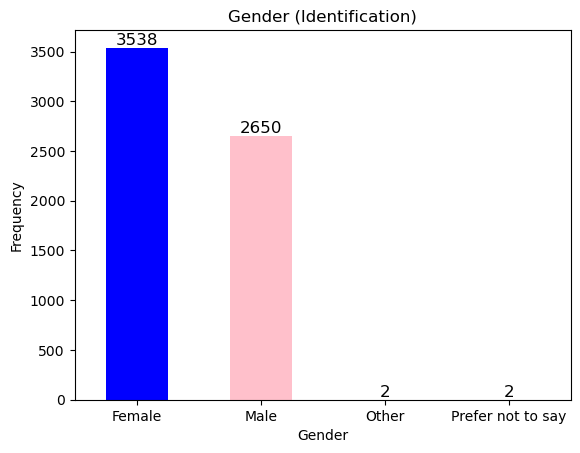

In [11]:
for i, count in enumerate(gender):
    gender.plot(kind='bar', title='Gender (Identification)', color=['blue', 'pink','red','black']).text(i, count, str(count), ha='center', va='bottom', fontsize = 12)

gender.plot(kind='bar', title='Gender (Identification)', color=['blue', 'pink','red','black'])
plt.xlabel('Gender')
plt.ylabel('Frequency')
plt.xticks(rotation=0)  
plt.show()

In [12]:
Data_New

,LocationLatitude,LocationLongitude,Q123,Q135,Q2.3,Q2.2,Q143,Q144,Q2.4_1,Q2.4_2
0,5.658543,-0.177449,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,5.658565,-0.177428,12.0,"Yes, I consent and will take part in the survey.",Female,18.0,Employed (full time),40.0,Central,Gomoa West District
2,5.420680,-0.833922,148.0,"Yes, I consent and will take part in the survey.",Female,29.0,Employed (part time),70.0,Central,Gomoa West District
3,5.550201,-0.217407,148.0,"Yes, I consent and will take part in the survey.",Female,32.0,Employed (full time),100.0,Central,Gomoa West District
4,5.550201,-0.217407,148.0,"Yes, I consent and will take part in the survey.",Male,39.0,Employed (full time),120.0,Central,Gomoa West District
...,...,...,...,...,...,...,...,...,...,...
6349,6.308776,-0.184552,6169.0,"Yes, I consent and will take part in the survey.",Female,24.0,Employed (full time),200.0,Eastern,Upper Manya Krobo District
6350,6.309607,-0.186764,6169.0,"Yes, I consent and will take part in the survey.",Female,68.0,Employed (part time),100.0,Eastern,Upper Manya Krobo District
6351,6.309626,-0.186765,6169.0,"Yes, I consent and will take part in the survey.",Male,34.0,Employed (full time),100.0,Eastern,Upper Manya Krobo District
6352,5.550201,-0.217407,624.0,"Yes, I consent and will take part in the survey.",Female,34.0,Home maker,350.0,Eastern,Upper Manya Krobo District


In [13]:
Data_New['Q135'].value_counts()

Q135
Yes, I consent and will take part in the survey.                       6280
No, I do NOT consent and therefore will NOT take part in the survey       2
Name: count, dtype: int64

## Changed the name of the columns based on the excel sheet provided to us which contained the information of questions asked in the survey

In [14]:
New_column = {'Q135':'Consent','Q2.3':'Gender','Q2.2':'Age','Q143':'Employment(Status)','Q144':'FoodExp(Weekly)','Q2.4_1':'Region','Q2.4_2':'District'}
Data_New = Data_New.rename(columns= New_column )


In [15]:
Data_New

,LocationLatitude,LocationLongitude,Q123,Consent,Gender,Age,Employment(Status),FoodExp(Weekly),Region,District
0,5.658543,-0.177449,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,5.658565,-0.177428,12.0,"Yes, I consent and will take part in the survey.",Female,18.0,Employed (full time),40.0,Central,Gomoa West District
2,5.420680,-0.833922,148.0,"Yes, I consent and will take part in the survey.",Female,29.0,Employed (part time),70.0,Central,Gomoa West District
3,5.550201,-0.217407,148.0,"Yes, I consent and will take part in the survey.",Female,32.0,Employed (full time),100.0,Central,Gomoa West District
4,5.550201,-0.217407,148.0,"Yes, I consent and will take part in the survey.",Male,39.0,Employed (full time),120.0,Central,Gomoa West District
...,...,...,...,...,...,...,...,...,...,...
6349,6.308776,-0.184552,6169.0,"Yes, I consent and will take part in the survey.",Female,24.0,Employed (full time),200.0,Eastern,Upper Manya Krobo District
6350,6.309607,-0.186764,6169.0,"Yes, I consent and will take part in the survey.",Female,68.0,Employed (part time),100.0,Eastern,Upper Manya Krobo District
6351,6.309626,-0.186765,6169.0,"Yes, I consent and will take part in the survey.",Male,34.0,Employed (full time),100.0,Eastern,Upper Manya Krobo District
6352,5.550201,-0.217407,624.0,"Yes, I consent and will take part in the survey.",Female,34.0,Home maker,350.0,Eastern,Upper Manya Krobo District


In [16]:
emp= Data_New['Employment(Status)'].value_counts()

In [17]:
Mean_age = Data_New.groupby('Gender')['Age'].mean()
print(Mean_age)

Gender
Female               37.581119
Male                 36.863774
Other                48.500000
Prefer not to say    51.500000
Name: Age, dtype: float64


In [18]:
Median_age= Data_New.groupby('Gender')['Age'].median()
print(Median_age)

Gender
Female               33.0
Male                 33.0
Other                48.5
Prefer not to say    51.5
Name: Age, dtype: float64


## Mean age plot by gender

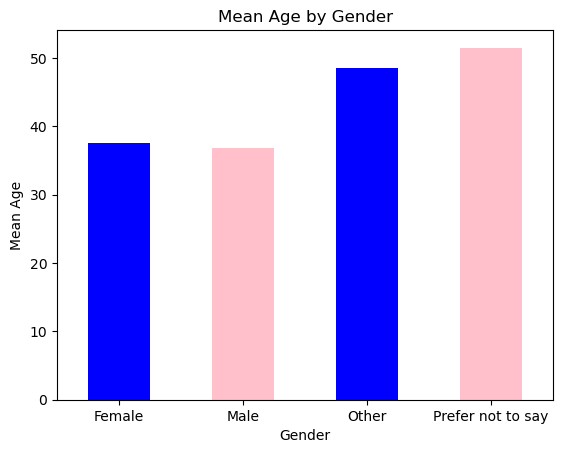

In [19]:
Mean_age.plot(kind='bar',title='Mean Age by Gender', color= ['blue','pink'])
plt.xlabel('Gender')
plt.ylabel('Mean Age')
plt.xticks(rotation=0)  # Keep the x labels horizontal
plt.show()

## Median age plot or Box plot by Gender
### Median age of both Male and Female here are same

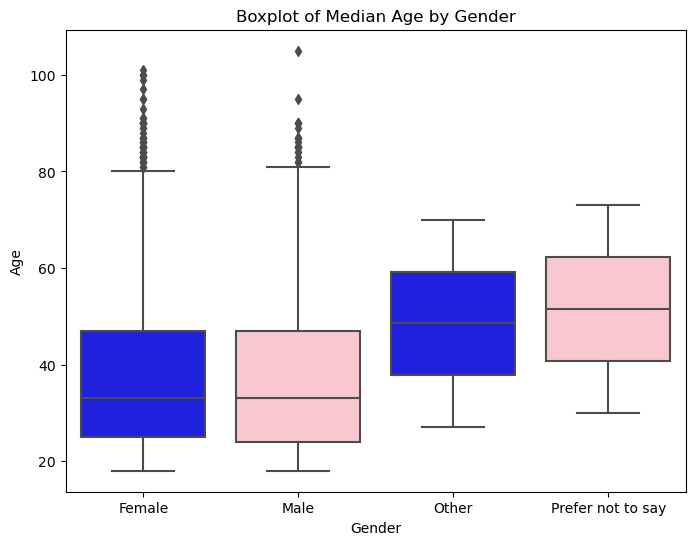

In [20]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='Gender', y='Age', data=Data_New, palette=['blue', 'pink'])
plt.title('Boxplot of Median Age by Gender')
plt.xlabel('Gender')
plt.ylabel('Age')
plt.show()

## Mean Age of people based on different Employment Status 
#### Retired people have the highest mean age which is very logical

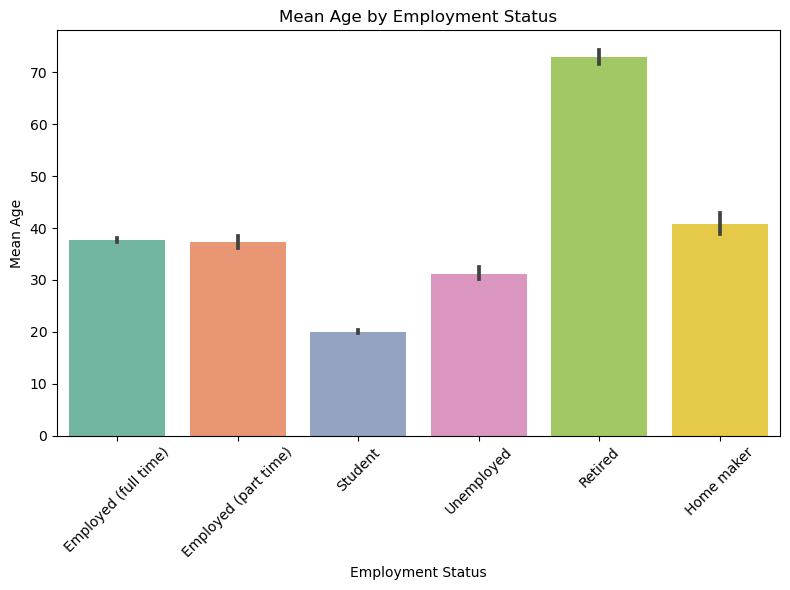

In [21]:
# Plotting with seaborn
plt.figure(figsize=(8, 6))
sns.barplot(x='Employment(Status)', y='Age', data=Data_New, palette='Set2')
plt.title('Mean Age by Employment Status')
plt.xlabel('Employment Status')
plt.ylabel('Mean Age')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()


In [22]:

Emp_Gen = Data_New.groupby(['Gender', 'Employment(Status)']).size().reset_index(name='Count')

print("Employment Status Counts by Gender:")
print(Emp_Gen)


Employment Status Counts by Gender:
               Gender    Employment(Status)  Count
0              Female  Employed (full time)   1903
1              Female  Employed (part time)    510
2              Female            Home maker    237
3              Female               Retired    154
4              Female               Student    149
5              Female            Unemployed    585
6                Male  Employed (full time)   1751
7                Male  Employed (part time)    330
8                Male            Home maker     61
9                Male               Retired     83
10               Male               Student    234
11               Male            Unemployed    191
12              Other               Retired      1
13              Other            Unemployed      1
14  Prefer not to say  Employed (full time)      1
15  Prefer not to say               Retired      1


## Plot based on Employment Status by Gender
### The count of Females in both *Employed (Full-time) & (Part-time)* is more than Males but so are *Unemployed counts*

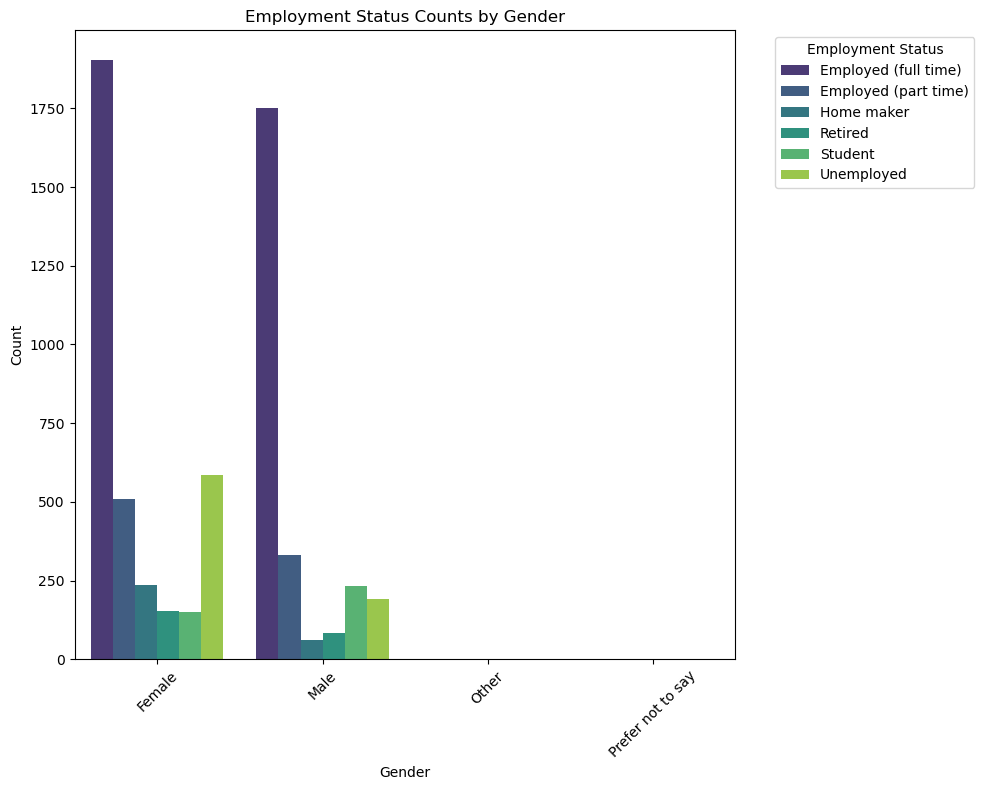

In [23]:
# Plotting with seaborn (stacked bar plot)
plt.figure(figsize=(10, 8))
sns.barplot(x='Gender', y='Count', hue='Employment(Status)', data=Emp_Gen, palette='viridis')
plt.title('Employment Status Counts by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.legend(title='Employment Status', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


## Created a boxplot based on Food Expenses by different Genders
### Had to remove massive outliers in male data to make sense of the plot
### Here we can observe that the earning capacity of the Other Gender might be low, but cannot conclude that their might be discrimination as the dataset only includes 2 people of the Other Gender

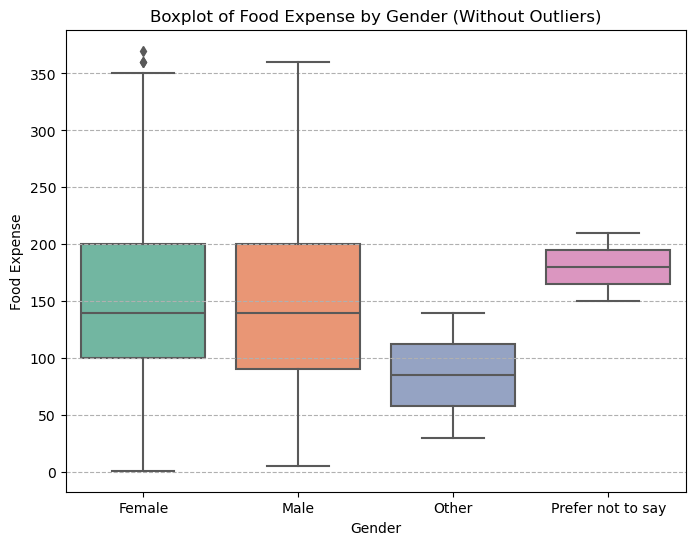

In [24]:

Q1 = Data_New['FoodExp(Weekly)'].quantile(0.25)
Q3 = Data_New['FoodExp(Weekly)'].quantile(0.75)
IQR = Q3 - Q1
outlier_threshold = 1.5 * IQR
outliers = Data_New[(Data_New['FoodExp(Weekly)'] < Q1 - outlier_threshold) | (Data_New['FoodExp(Weekly)'] > Q3 + outlier_threshold)]


filtered_data = Data_New[~Data_New.index.isin(outliers.index)]


plt.figure(figsize=(8, 6))
sns.boxplot(x='Gender', y='FoodExp(Weekly)', data=filtered_data, palette='Set2')
plt.title('Boxplot of Food Expense by Gender (Without Outliers)')
plt.xlabel('Gender')
plt.ylabel('Food Expense')
plt.grid(axis='y', linestyle='--')
plt.show()

## Boxplot Based on Food expenses of Different Employment Status of people
### Median Food expenses of Homemaker being the highest

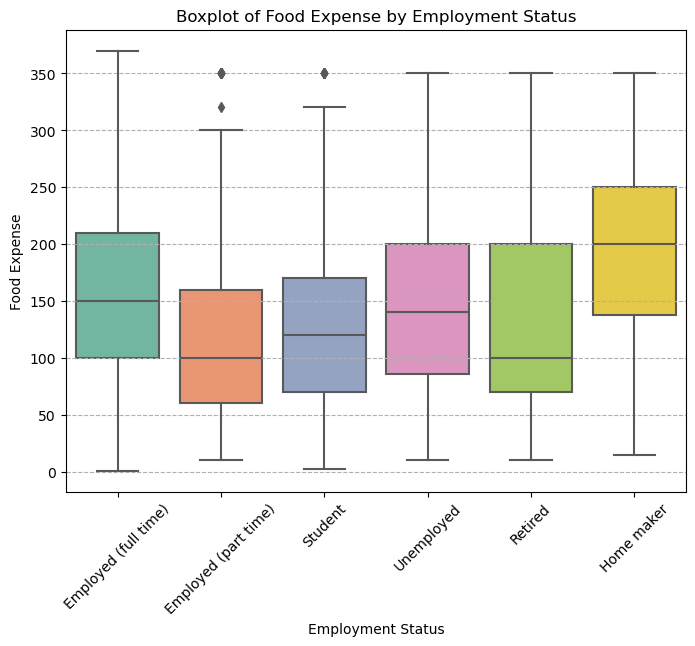

In [25]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='Employment(Status)', y='FoodExp(Weekly)', data=filtered_data, palette='Set2')
plt.title('Boxplot of Food Expense by Employment Status')
plt.xlabel('Employment Status')
plt.ylabel('Food Expense')
plt.grid(axis='y', linestyle='--')
plt.xticks(rotation=45)
plt.show()

In [26]:
Data_New

,LocationLatitude,LocationLongitude,Q123,Consent,Gender,Age,Employment(Status),FoodExp(Weekly),Region,District
0,5.658543,-0.177449,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,5.658565,-0.177428,12.0,"Yes, I consent and will take part in the survey.",Female,18.0,Employed (full time),40.0,Central,Gomoa West District
2,5.420680,-0.833922,148.0,"Yes, I consent and will take part in the survey.",Female,29.0,Employed (part time),70.0,Central,Gomoa West District
3,5.550201,-0.217407,148.0,"Yes, I consent and will take part in the survey.",Female,32.0,Employed (full time),100.0,Central,Gomoa West District
4,5.550201,-0.217407,148.0,"Yes, I consent and will take part in the survey.",Male,39.0,Employed (full time),120.0,Central,Gomoa West District
...,...,...,...,...,...,...,...,...,...,...
6349,6.308776,-0.184552,6169.0,"Yes, I consent and will take part in the survey.",Female,24.0,Employed (full time),200.0,Eastern,Upper Manya Krobo District
6350,6.309607,-0.186764,6169.0,"Yes, I consent and will take part in the survey.",Female,68.0,Employed (part time),100.0,Eastern,Upper Manya Krobo District
6351,6.309626,-0.186765,6169.0,"Yes, I consent and will take part in the survey.",Male,34.0,Employed (full time),100.0,Eastern,Upper Manya Krobo District
6352,5.550201,-0.217407,624.0,"Yes, I consent and will take part in the survey.",Female,34.0,Home maker,350.0,Eastern,Upper Manya Krobo District


In [27]:
shapefile_path = r'D:\GPhotos\New folder\ne_110m_admin_0_countries.shp'
world = gpd.read_file(shapefile_path)

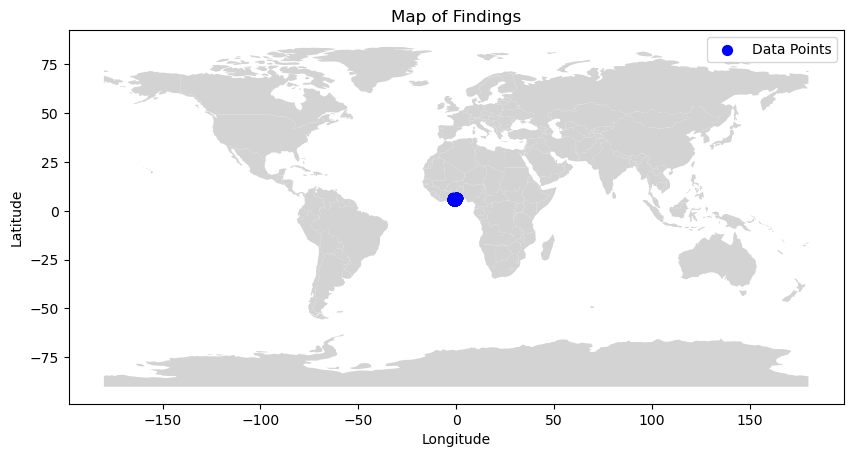

In [28]:
geometry = gpd.points_from_xy(Data_New['LocationLongitude'], Data_New['LocationLatitude'])
gdf = gpd.GeoDataFrame(Data_New, geometry=geometry)


fig, ax = plt.subplots(figsize=(10, 8))
world.plot(ax=ax, color='lightgray')
gdf.plot(ax=ax, markersize=50, color='blue', marker='o', label='Data Points')
ax.set_title('Map of Findings')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend()
plt.show()

In [29]:
world.head()

,featurecla,scalerank,LABELRANK,SOVEREIGNT,SOV_A3,ADM0_DIF,LEVEL,TYPE,TLC,ADMIN,...,FCLASS_TR,FCLASS_ID,FCLASS_PL,FCLASS_GR,FCLASS_IT,FCLASS_NL,FCLASS_SE,FCLASS_BD,FCLASS_UA,geometry
0,Admin-0 country,1,6,Fiji,FJI,0,2,Sovereign country,1,Fiji,...,None,None,None,None,None,None,None,None,None,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,Admin-0 country,1,3,United Republic of Tanzania,TZA,0,2,Sovereign country,1,United Republic of Tanzania,...,None,None,None,None,None,None,None,None,None,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,Admin-0 country,1,7,Western Sahara,SAH,0,2,Indeterminate,1,Western Sahara,...,Unrecognized,Unrecognized,Unrecognized,None,None,Unrecognized,None,None,None,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,Admin-0 country,1,2,Canada,CAN,0,2,Sovereign country,1,Canada,...,None,None,None,None,None,None,None,None,None,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,Admin-0 country,1,2,United States of America,US1,1,2,Country,1,United States of America,...,None,None,None,None,None,None,None,None,None,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."


## As observations were from Ghana tried to create a Map plot of Ghana
### Following is the Data cleaining and filtering which was required 

In [30]:
west_africa = world[world['ADMIN'].isin(['Ghana'])]

<Figure size 1000x800 with 0 Axes>

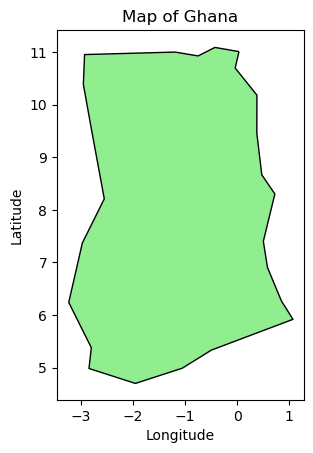

In [31]:
plt.figure(figsize=(10, 8))
ax = west_africa.plot(color='lightgreen', edgecolor='black')
plt.title('Map of Ghana')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

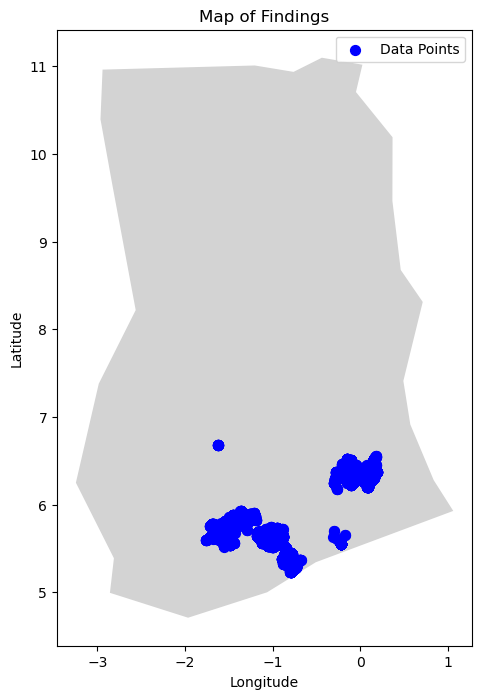

In [32]:
fig, ax = plt.subplots(figsize=(10, 8))
west_africa.plot(ax=ax, color='lightgray')
gdf.plot(ax=ax, markersize=50, color='blue', marker='o', label='Data Points')
ax.set_title('Map of Findings')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend()
plt.show()

In [33]:
Data_New

,LocationLatitude,LocationLongitude,Q123,Consent,Gender,Age,Employment(Status),FoodExp(Weekly),Region,District
0,5.658543,-0.177449,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,5.658565,-0.177428,12.0,"Yes, I consent and will take part in the survey.",Female,18.0,Employed (full time),40.0,Central,Gomoa West District
2,5.420680,-0.833922,148.0,"Yes, I consent and will take part in the survey.",Female,29.0,Employed (part time),70.0,Central,Gomoa West District
3,5.550201,-0.217407,148.0,"Yes, I consent and will take part in the survey.",Female,32.0,Employed (full time),100.0,Central,Gomoa West District
4,5.550201,-0.217407,148.0,"Yes, I consent and will take part in the survey.",Male,39.0,Employed (full time),120.0,Central,Gomoa West District
...,...,...,...,...,...,...,...,...,...,...
6349,6.308776,-0.184552,6169.0,"Yes, I consent and will take part in the survey.",Female,24.0,Employed (full time),200.0,Eastern,Upper Manya Krobo District
6350,6.309607,-0.186764,6169.0,"Yes, I consent and will take part in the survey.",Female,68.0,Employed (part time),100.0,Eastern,Upper Manya Krobo District
6351,6.309626,-0.186765,6169.0,"Yes, I consent and will take part in the survey.",Male,34.0,Employed (full time),100.0,Eastern,Upper Manya Krobo District
6352,5.550201,-0.217407,624.0,"Yes, I consent and will take part in the survey.",Female,34.0,Home maker,350.0,Eastern,Upper Manya Krobo District


In [34]:
gdf.head()

,LocationLatitude,LocationLongitude,Q123,Consent,Gender,Age,Employment(Status),FoodExp(Weekly),Region,District,geometry
0,5.658543,-0.177449,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,POINT (-0.17745 5.65854)
1,5.658565,-0.177428,12.0,"Yes, I consent and will take part in the survey.",Female,18.0,Employed (full time),40.0,Central,Gomoa West District,POINT (-0.17743 5.65857)
2,5.420680,-0.833922,148.0,"Yes, I consent and will take part in the survey.",Female,29.0,Employed (part time),70.0,Central,Gomoa West District,POINT (-0.83392 5.42068)
3,5.550201,-0.217407,148.0,"Yes, I consent and will take part in the survey.",Female,32.0,Employed (full time),100.0,Central,Gomoa West District,POINT (-0.21741 5.55020)
4,5.550201,-0.217407,148.0,"Yes, I consent and will take part in the survey.",Male,39.0,Employed (full time),120.0,Central,Gomoa West District,POINT (-0.21741 5.55020)


In [35]:
d_counts= Data_New['District'].value_counts()
d_names_list = d_counts.index.tolist()

In [36]:
print(d_names_list)

['Asikuma Odoben Brankwa District', 'Gomoa West District', 'Asuogyaman District', 'Assin North District', 'Upper Manya Krobo District', 'Twifo Atti Morkwa District', 'Ayensuano District', 'New Juaben North Municipal', 'Akyemansa District', 'Lower Manya Krobo Municipal', 'Gomoa Central District', 'Ga West Municipal', 'Twifo Heman Lower Denkyira District', 'Gomoa East District', 'Atiwa West District']


In [37]:
d_counts

District
Asikuma Odoben Brankwa District        1092
Gomoa West District                    1071
Asuogyaman District                    1051
Assin North District                   1045
Upper Manya Krobo District             1040
Twifo Atti Morkwa District              879
Ayensuano District                        3
New Juaben North Municipal                2
Akyemansa District                        2
Lower Manya Krobo Municipal               2
Gomoa Central District                    1
Ga West Municipal                         1
Twifo Heman Lower Denkyira District       1
Gomoa East District                       1
Atiwa West District                       1
Name: count, dtype: int64

In [38]:
districts_of_interest = [
    'Asikuma Odoben Brankwa District', 'Gomoa West District', 'Asuogyaman District',
    'Assin North District', 'Upper Manya Krobo District', 'Twifo Atti Morkwa District'
]


district_subsets= {}
for district in districts_of_interest:
    district_data = gdf[gdf['District']==district]
    district_subsets[district] = district_data


print(district_subsets['Asikuma Odoben Brankwa District'].head())

      LocationLatitude  LocationLongitude    Q123  \
1108          5.679745          -1.045676  2147.0   
1109          5.587409          -0.974030   262.0   
1110          5.550201          -0.217407   262.0   
1111          5.550201          -0.217407   262.0   
1112          5.550201          -0.217407   262.0   

                                               Consent  Gender   Age  \
1108  Yes, I consent and will take part in the survey.  Female  65.0   
1109  Yes, I consent and will take part in the survey.    Male  22.0   
1110  Yes, I consent and will take part in the survey.    Male  43.0   
1111  Yes, I consent and will take part in the survey.  Female  36.0   
1112  Yes, I consent and will take part in the survey.    Male  38.0   

        Employment(Status)  FoodExp(Weekly)   Region  \
1108  Employed (full time)            180.0  Central   
1109  Employed (full time)             50.0  Central   
1110  Employed (full time)            500.0  Central   
1111  Employed (full tim

In [39]:
district_names = [
    'Asikuma Odoben Brankwa District', 'Gomoa West District', 'Asuogyaman District',
    'Assin North District', 'Upper Manya Krobo District', 'Twifo Atti Morkwa District'
]


district_data_list = []


for district_name in district_names:
    subset = gdf[gdf['District'] == district_name]
    district_data_list.append(subset)


for i, district_data in enumerate(district_data_list):
    district_name = district_names[i]
    print(f"Data for {district_name}:")
    print(district_data.head())  # Adjust as needed to view more rows or specific columns
    print()

Data for Asikuma Odoben Brankwa District:
      LocationLatitude  LocationLongitude    Q123  \
1108          5.679745          -1.045676  2147.0   
1109          5.587409          -0.974030   262.0   
1110          5.550201          -0.217407   262.0   
1111          5.550201          -0.217407   262.0   
1112          5.550201          -0.217407   262.0   

                                               Consent  Gender   Age  \
1108  Yes, I consent and will take part in the survey.  Female  65.0   
1109  Yes, I consent and will take part in the survey.    Male  22.0   
1110  Yes, I consent and will take part in the survey.    Male  43.0   
1111  Yes, I consent and will take part in the survey.  Female  36.0   
1112  Yes, I consent and will take part in the survey.    Male  38.0   

        Employment(Status)  FoodExp(Weekly)   Region  \
1108  Employed (full time)            180.0  Central   
1109  Employed (full time)             50.0  Central   
1110  Employed (full time)            

In [40]:
district_data_list[5]

,LocationLatitude,LocationLongitude,Q123,Consent,Gender,Age,Employment(Status),FoodExp(Weekly),Region,District,geometry
2233,5.609857,-1.550051,334.0,"Yes, I consent and will take part in the survey.",Female,22.0,Employed (full time),210.0,Central,Twifo Atti Morkwa District,POINT (-1.55005 5.60986)
2234,5.637744,-1.465009,398.0,"Yes, I consent and will take part in the survey.",Female,22.0,Unemployed,100.0,Central,Twifo Atti Morkwa District,POINT (-1.46501 5.63774)
2235,5.637750,-1.464895,398.0,"Yes, I consent and will take part in the survey.",Male,37.0,Employed (full time),90.0,Central,Twifo Atti Morkwa District,POINT (-1.46490 5.63775)
2236,5.550201,-0.217407,398.0,"Yes, I consent and will take part in the survey.",Female,54.0,Employed (full time),200.0,Central,Twifo Atti Morkwa District,POINT (-0.21741 5.55020)
2237,5.638519,-1.465427,398.0,"Yes, I consent and will take part in the survey.",Female,19.0,Unemployed,140.0,Central,Twifo Atti Morkwa District,POINT (-1.46543 5.63852)
...,...,...,...,...,...,...,...,...,...,...,...
3134,5.633408,-1.679334,371.0,"Yes, I consent and will take part in the survey.",Male,38.0,Employed (full time),140.0,Central,Twifo Atti Morkwa District,POINT (-1.67933 5.63341)
3135,5.633270,-1.679234,317.0,"Yes, I consent and will take part in the survey.",Female,30.0,Employed (full time),210.0,Central,Twifo Atti Morkwa District,POINT (-1.67923 5.63327)
3437,5.796832,-1.392219,445.0,"Yes, I consent and will take part in the survey.",Female,64.0,Unemployed,70.0,Central,Twifo Atti Morkwa District,POINT (-1.39222 5.79683)
3438,5.550201,-0.217407,445.0,"Yes, I consent and will take part in the survey.",Male,25.0,Unemployed,150.0,Central,Twifo Atti Morkwa District,POINT (-0.21741 5.55020)


### Created a Gendered map plot of Ghana based on the top 5 Districts

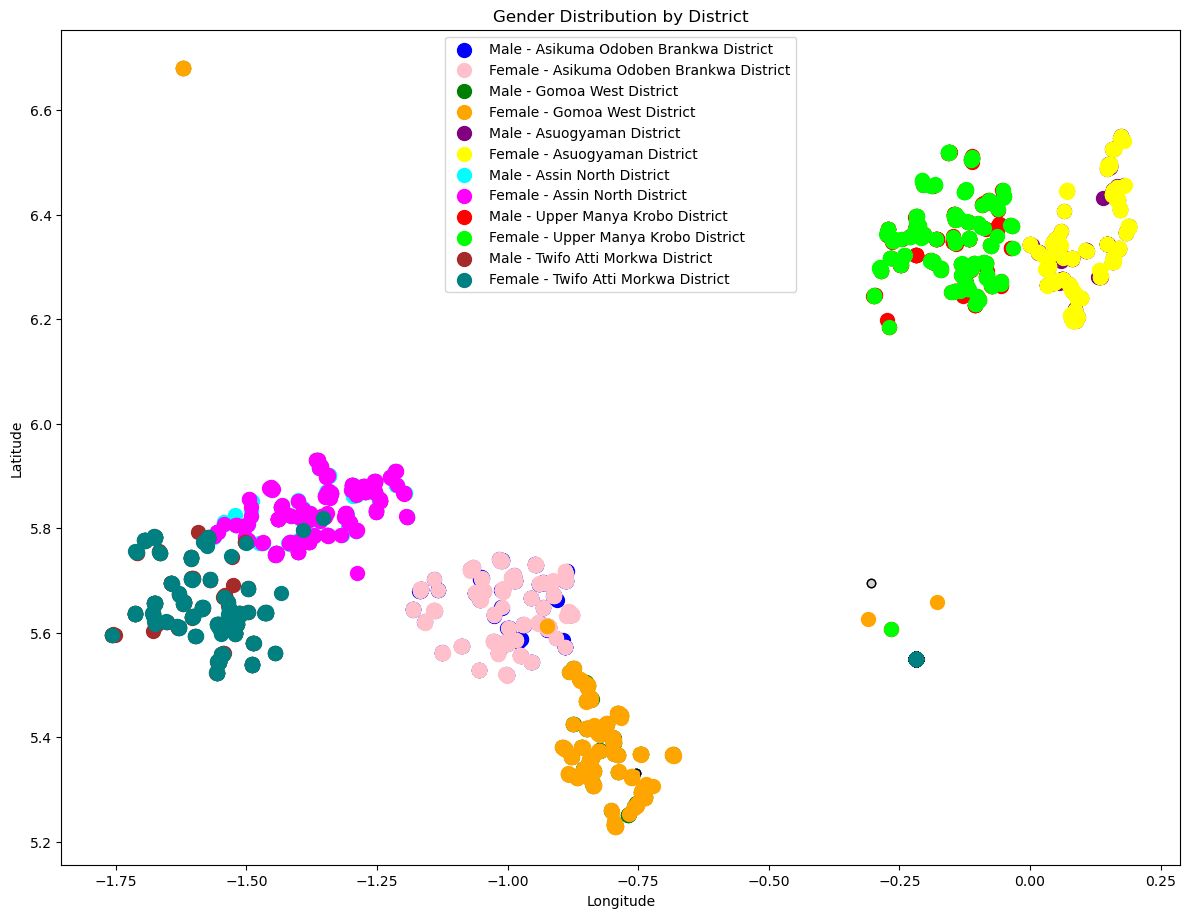

In [41]:
district_colors = {
    'Asikuma Odoben Brankwa District': {'Male': 'blue', 'Female': 'pink'},
    'Gomoa West District': {'Male': 'green', 'Female': 'orange'},
    'Asuogyaman District': {'Male': 'purple', 'Female': 'yellow'},
    'Assin North District': {'Male': 'cyan', 'Female': 'magenta'},
    'Upper Manya Krobo District': {'Male': 'red', 'Female': 'lime'},
    'Twifo Atti Morkwa District': {'Male': 'brown', 'Female': 'teal'}
}


fig, ax = plt.subplots(figsize=(12, 10))


gdf.plot(ax=ax, color='lightgray', edgecolor='black')


for i, district_name in enumerate(district_names):
    district_data = district_data_list[i]
    
    
    colors = district_colors[district_name]
    
    
    for gender, color in colors.items():
        gender_data = district_data[district_data['Gender'] == gender]
        gender_data.plot(ax=ax, markersize=100, color=color, marker='o', label=f'{gender} - {district_name}')


plt.title('Gender Distribution by District')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend()
plt.tight_layout()
plt.show()

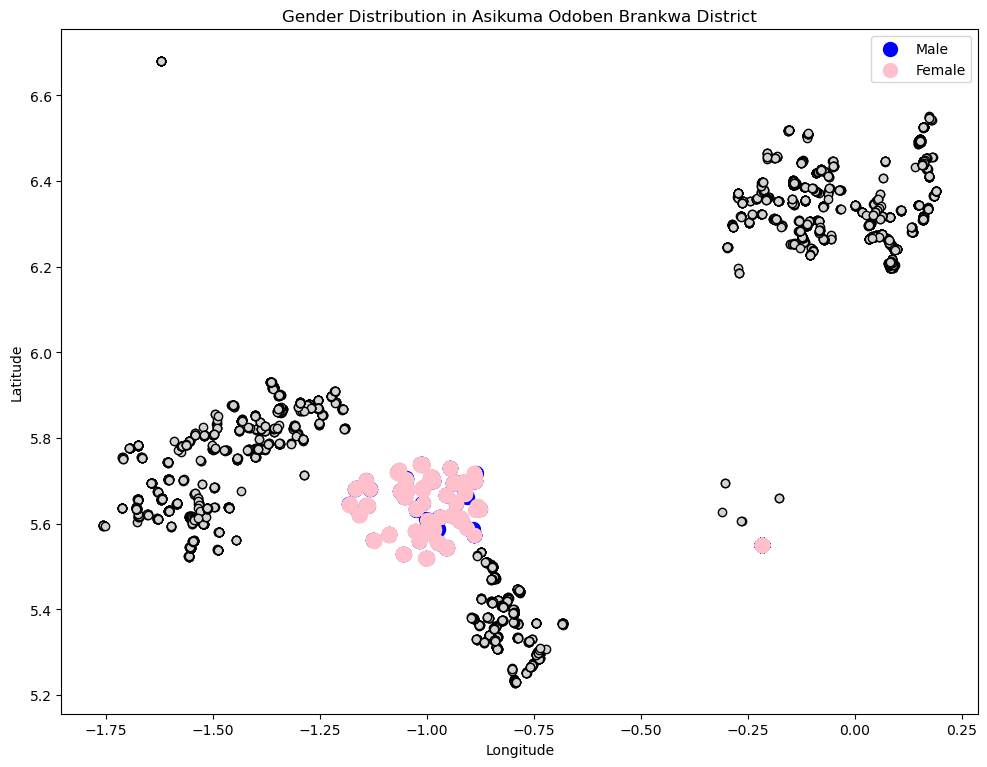

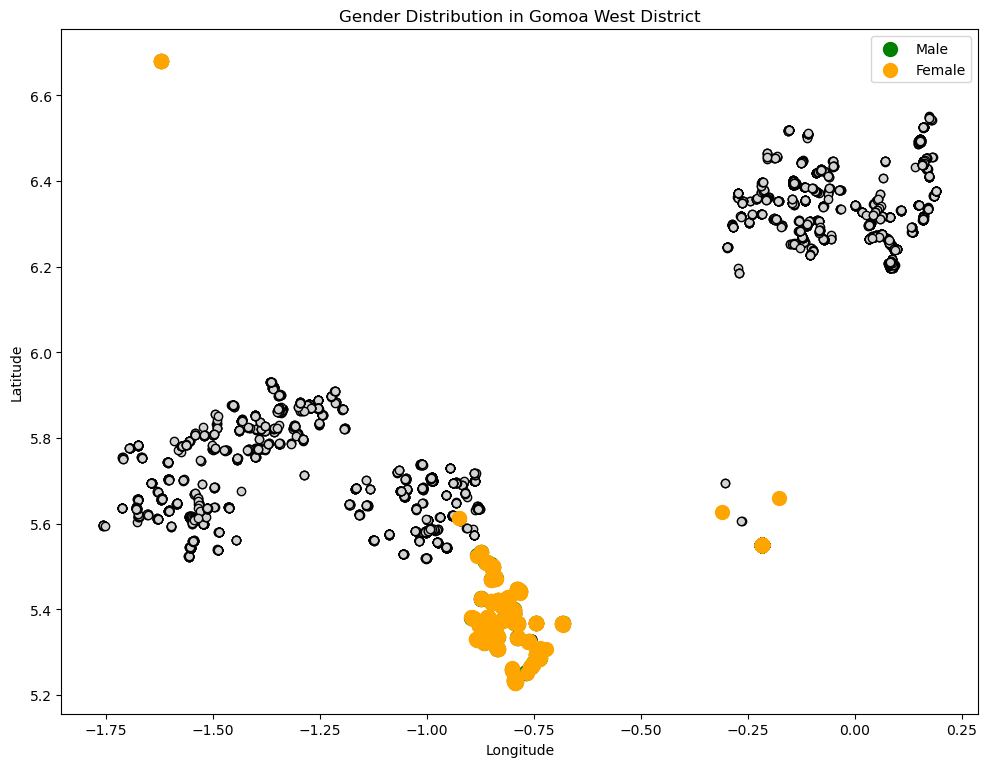

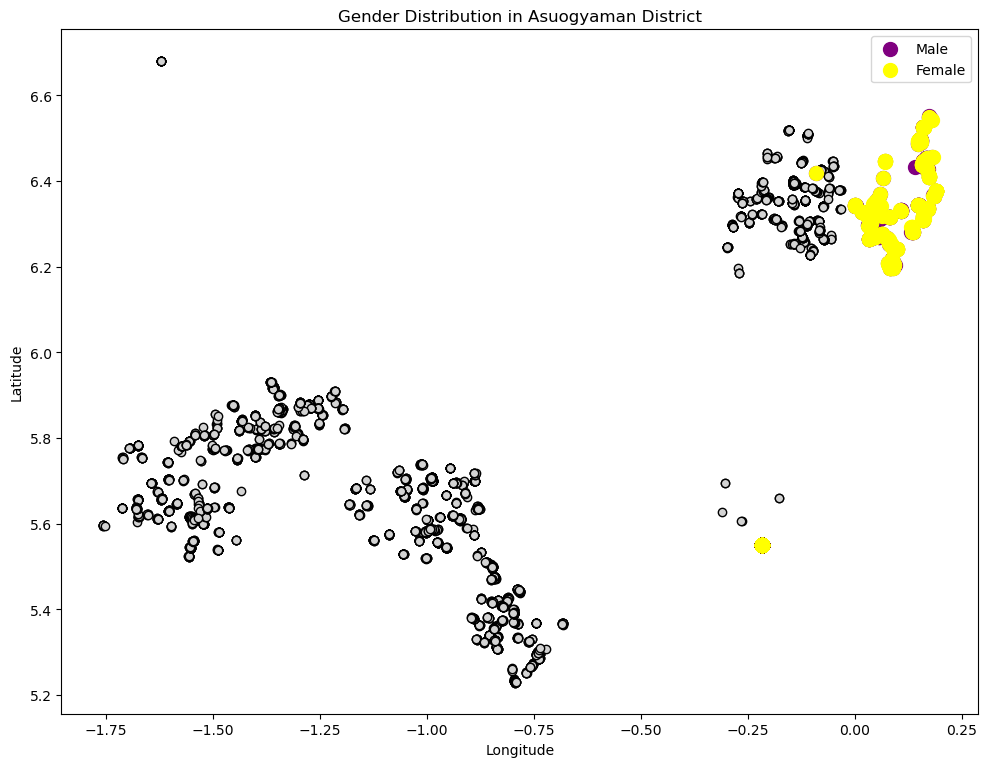

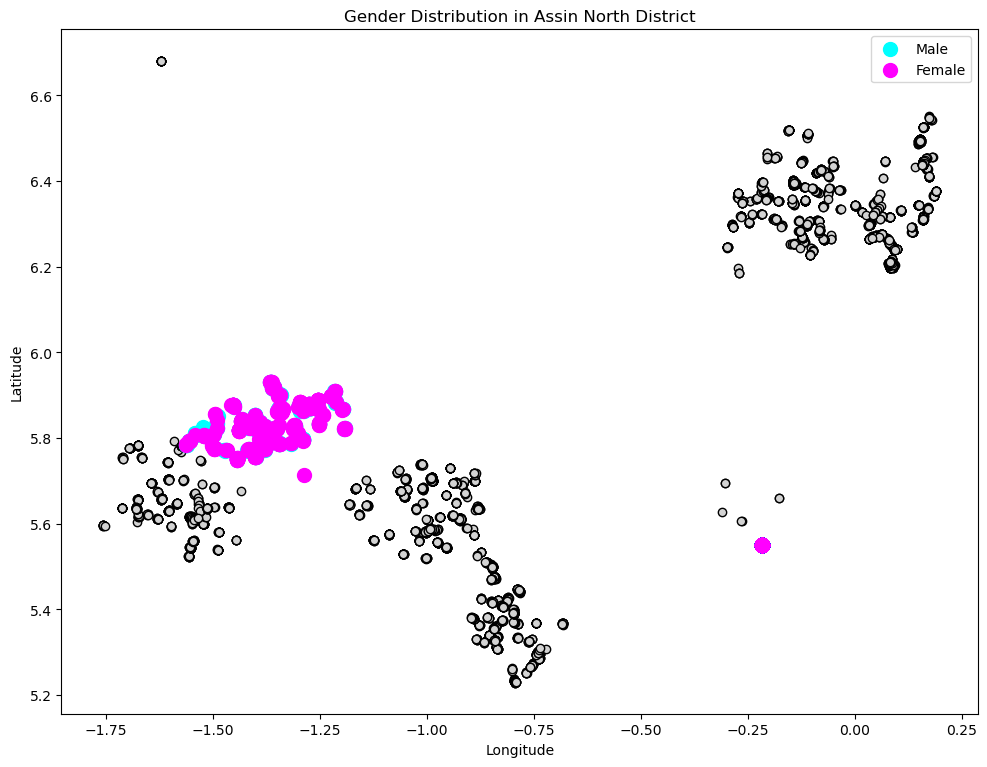

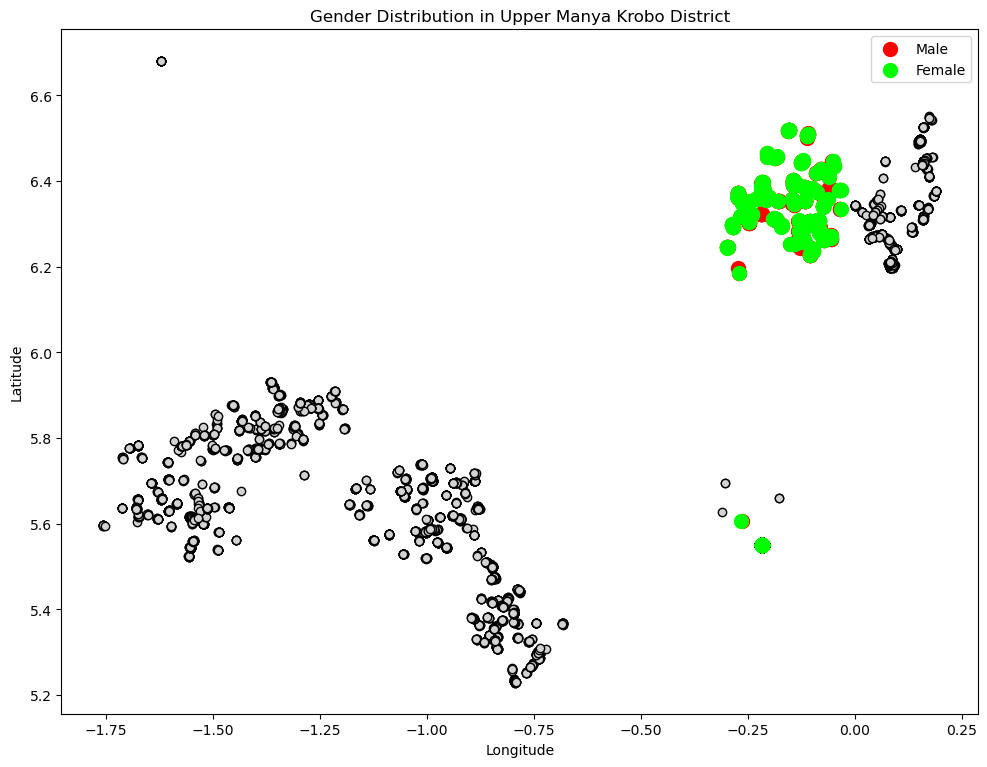

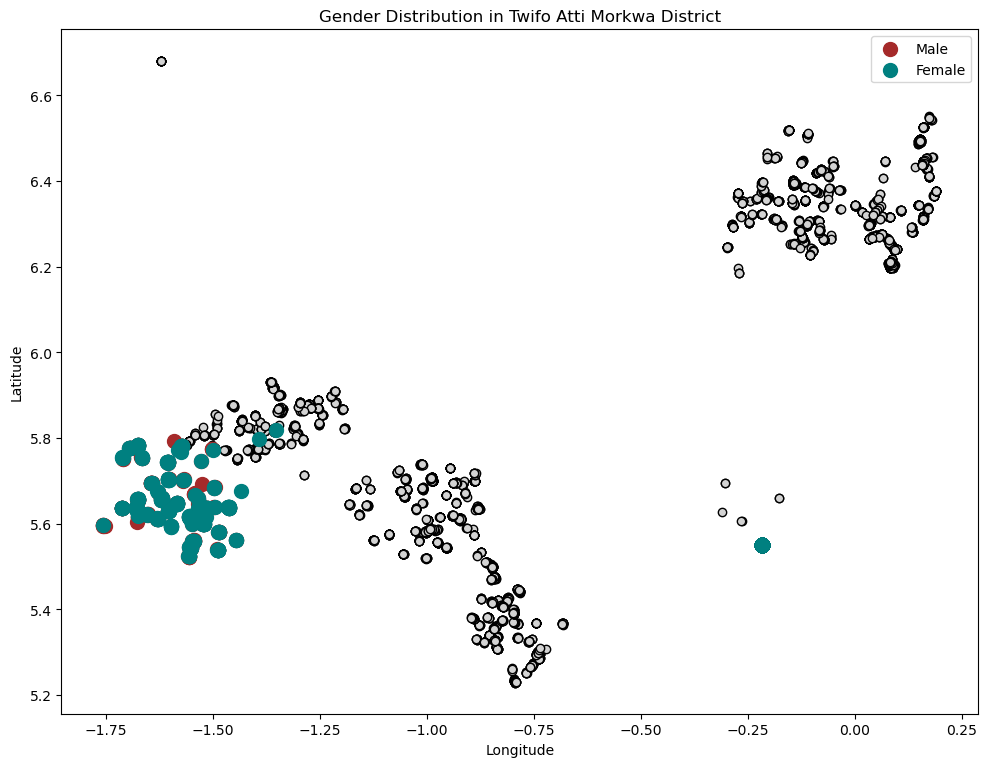

In [42]:
for district_name in district_names:
    district_data = gdf[gdf['District'] == district_name]
    
    # Get the color scheme for the current district
    colors = district_colors[district_name]
    
    # Create a new figure for the current district
    fig, ax = plt.subplots(figsize=(10, 8))
    
    # Plot the base map
    gdf.plot(ax=ax, color='lightgray', edgecolor='black')
    
    # Plot male and female data for the current district
    for gender, color in colors.items():
        gender_data = district_data[district_data['Gender'] == gender]
        gender_data.plot(ax=ax, markersize=100, color=color, marker='o', label=f'{gender}')
    
    # Set plot title and labels
    plt.title(f'Gender Distribution in {district_name}')
    plt.xlabel('Longitude')
    plt.ylabel('Latitude')
    plt.legend()
    plt.tight_layout()
    
    # Show the plot
    plt.show()

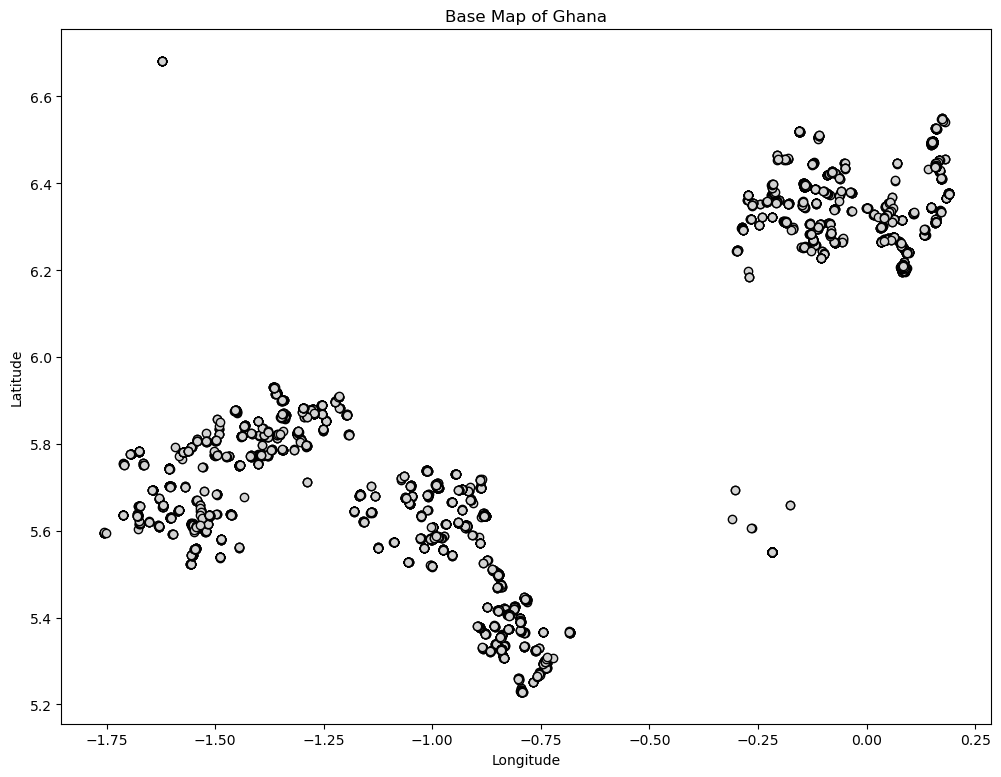

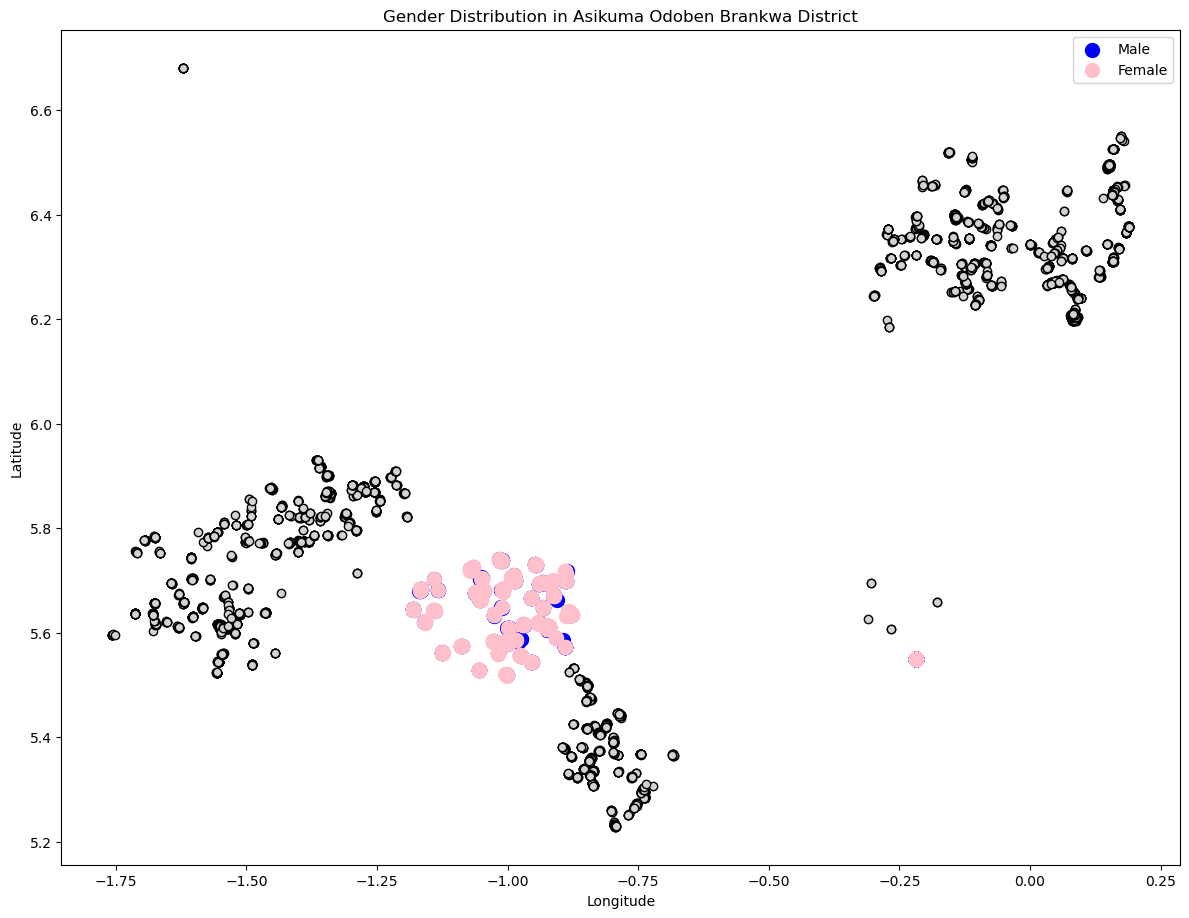

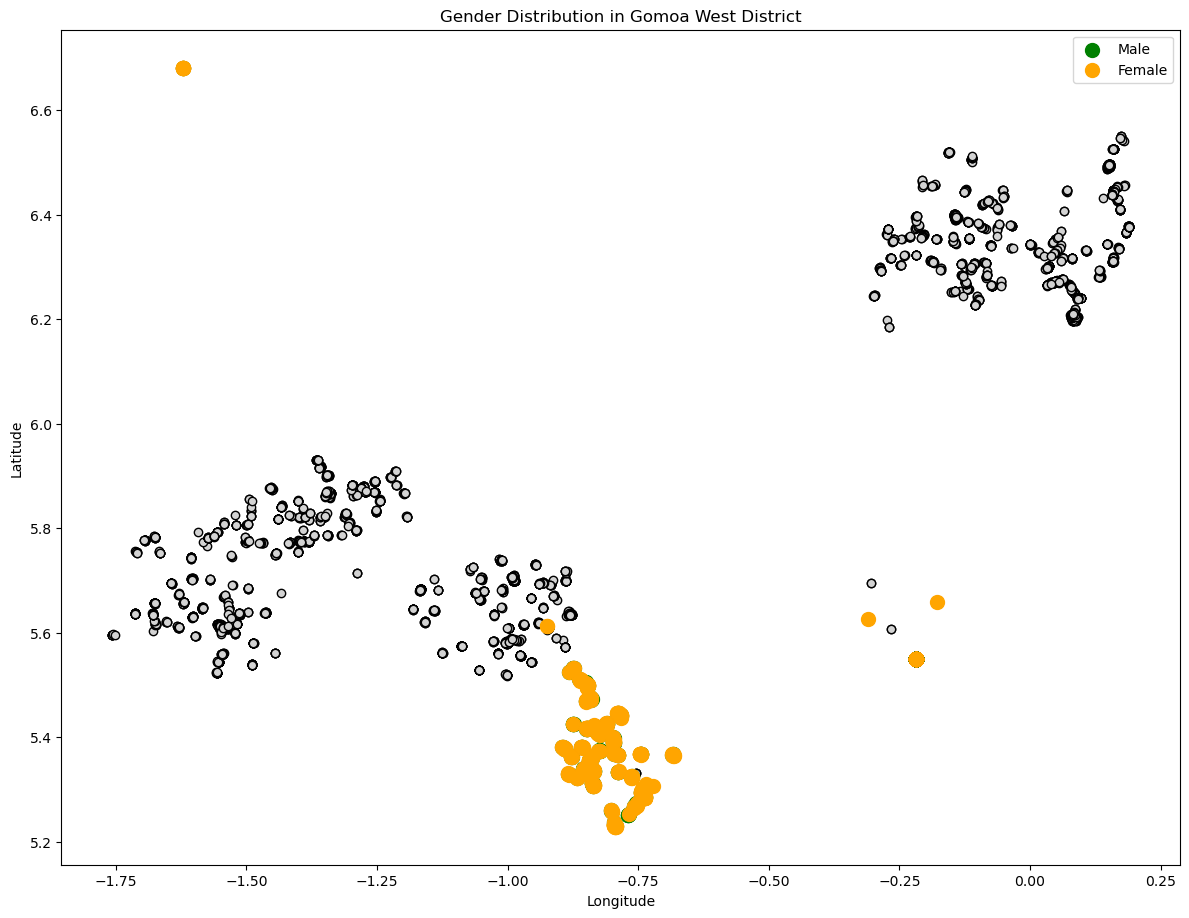

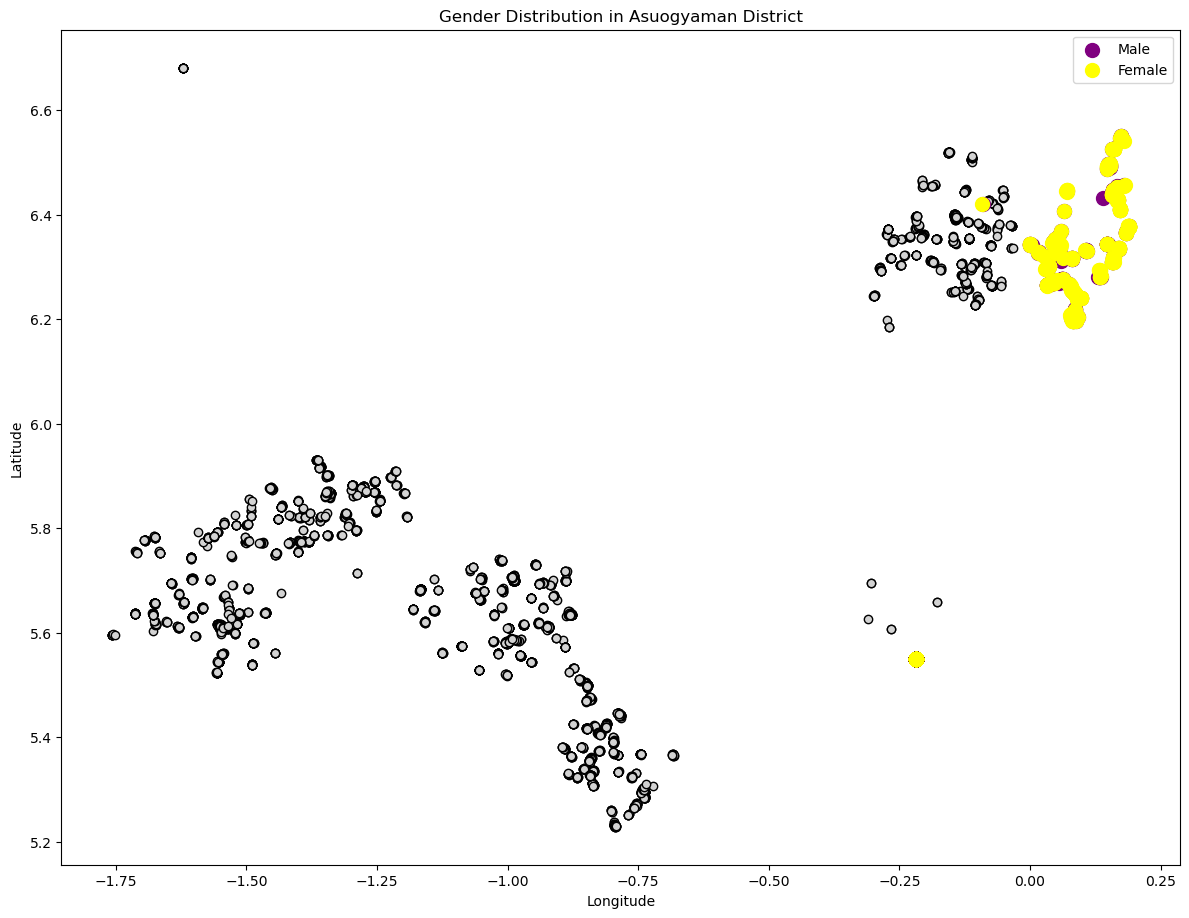

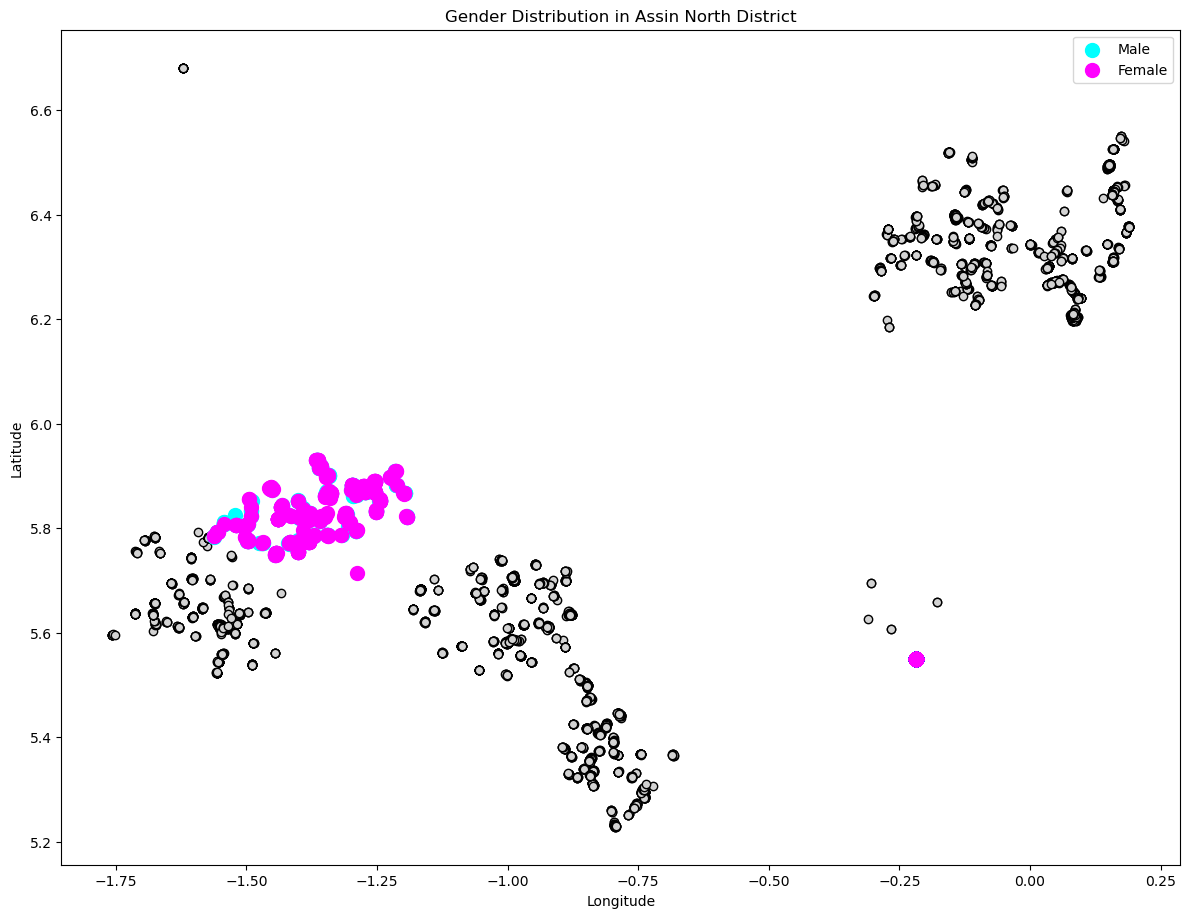

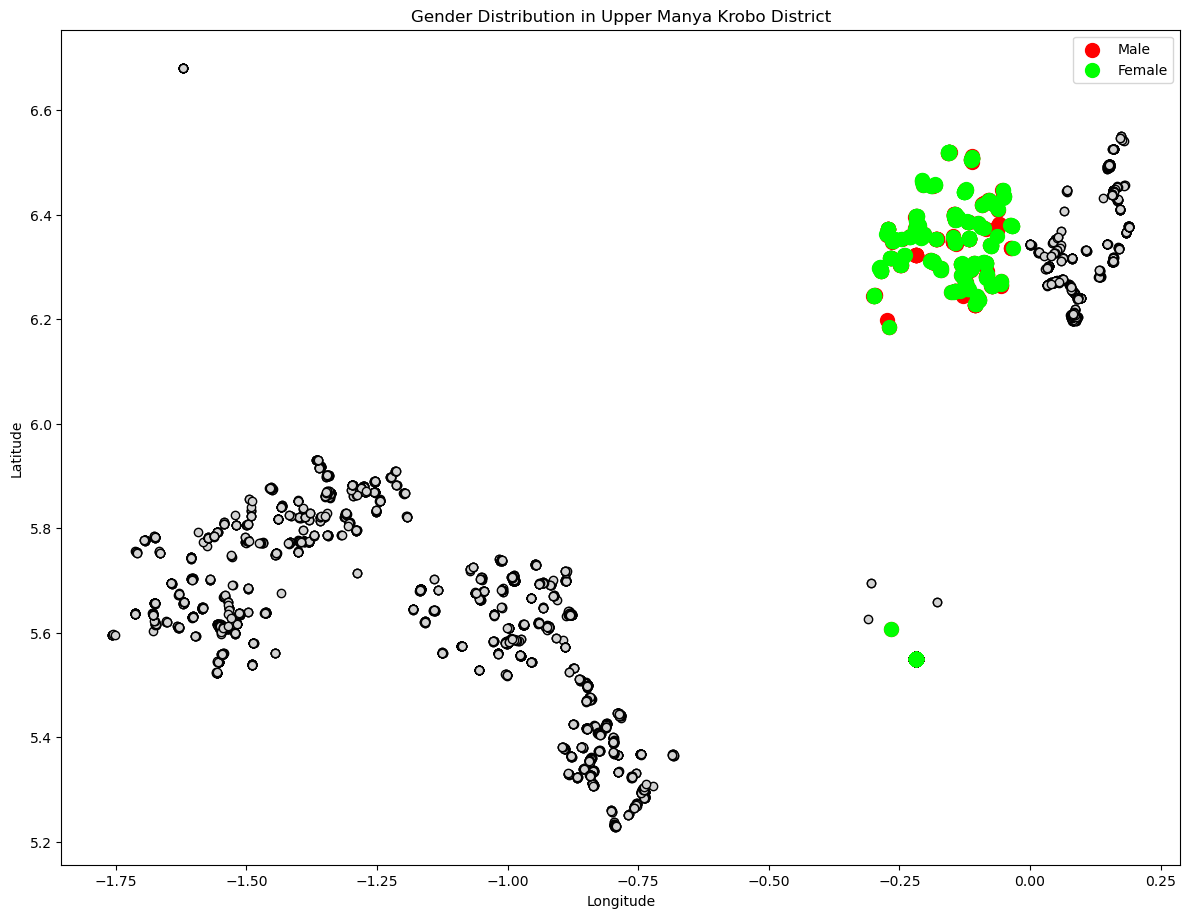

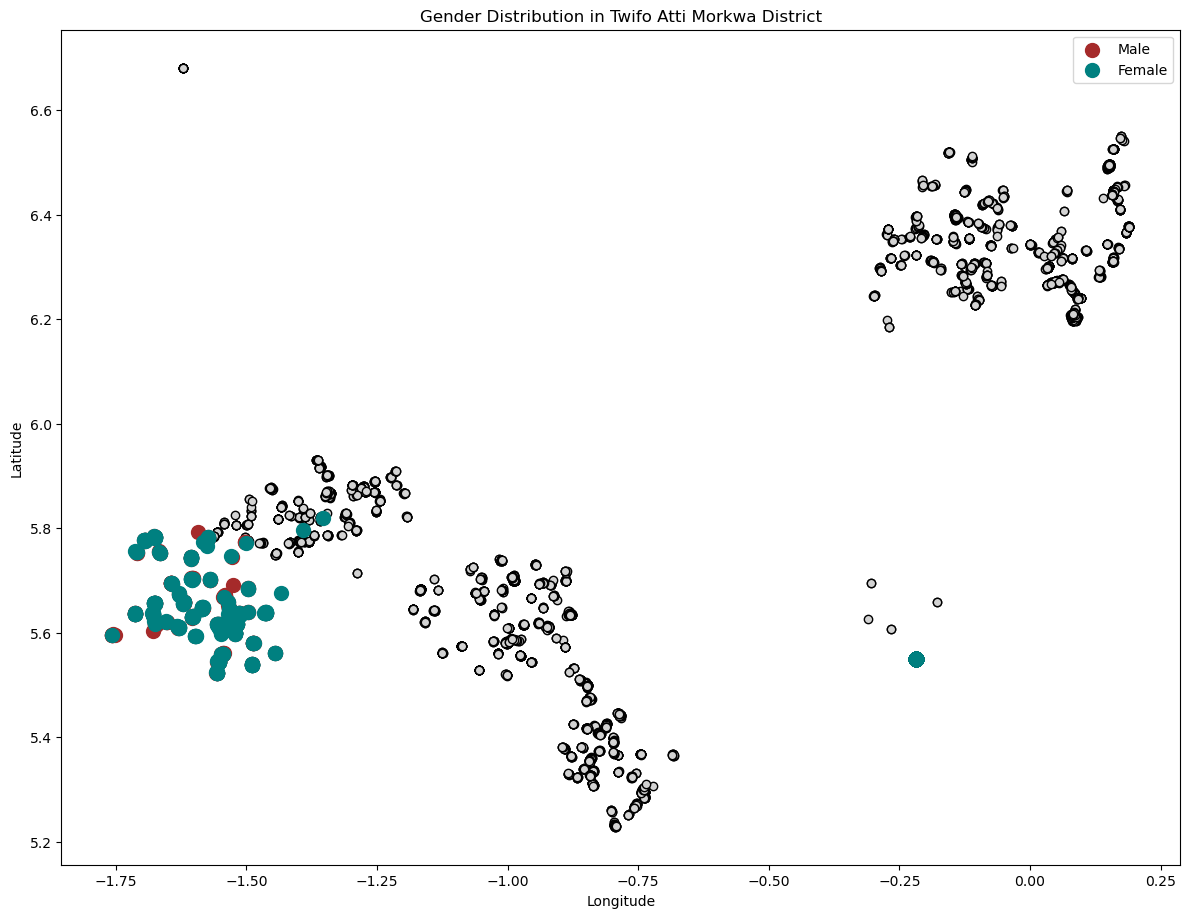

In [53]:
fig, base_ax = plt.subplots(figsize=(12, 10))
gdf.plot(ax=base_ax, color='lightgray', edgecolor='black')
plt.title('Base Map of Ghana')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()


for district_name in district_names:
    district_data = gdf[gdf['District'] == district_name]
    
   
    colors = district_colors[district_name]
    
    
    fig, ax = plt.subplots(figsize=(12, 10))
    
    
    gdf.plot(ax=ax, color='lightgray', edgecolor='black')
    
    
    for gender, color in colors.items():
        gender_data = district_data[district_data['Gender'] == gender]
        gender_data.plot(ax=ax, markersize=100, color=color, marker='o', label=f'{gender}')
    
    
    plt.title(f'Gender Distribution in {district_name}')
    plt.xlabel('Longitude')
    plt.ylabel('Latitude')
    plt.legend()
    plt.tight_layout()
    
    
    plt.show()
    


# Created Scatter Plots based on the Age vs Weekly Food expenses & Gender and Age vs Weekly Food Expenses


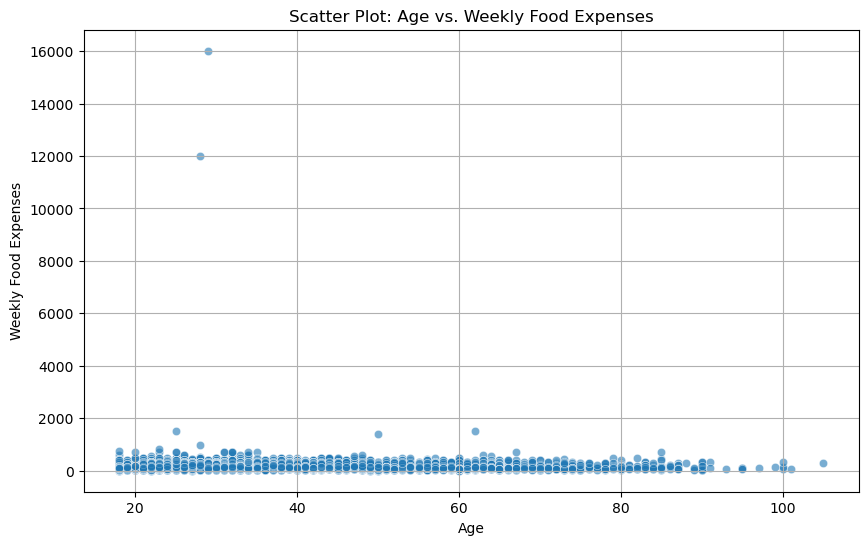

In [44]:
plt.figure(figsize=(10, 6))
plt.scatter(Data_New['Age'], Data_New['FoodExp(Weekly)'], alpha=0.6, edgecolors='w', linewidths=0.5)
plt.title('Scatter Plot: Age vs. Weekly Food Expenses')
plt.xlabel('Age')
plt.ylabel('Weekly Food Expenses')
plt.grid(True)
plt.show()

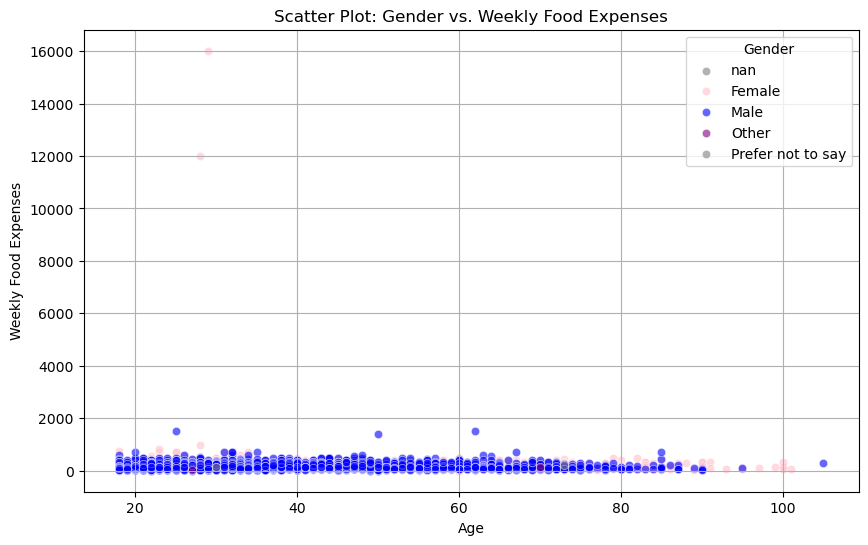

In [45]:
gender_colors = {'Male': 'blue', 'Female': 'pink', 'Other': 'purple'}
plt.figure(figsize=(10, 6))


for gender in Data_New['Gender'].unique():
    subset = Data_New[Data_New['Gender'] == gender]
    plt.scatter(subset['Age'], subset['FoodExp(Weekly)'], alpha=0.6, edgecolors='w', linewidths=0.5, 
                label=gender, color=gender_colors.get(gender, 'grey'))

plt.title('Scatter Plot: Gender vs. Weekly Food Expenses')
plt.xlabel('Age')
plt.ylabel('Weekly Food Expenses')
plt.legend(title='Gender')
plt.grid(True)
plt.show()

### This one turned out to be the best one so far for the map plot based on top 5 districts

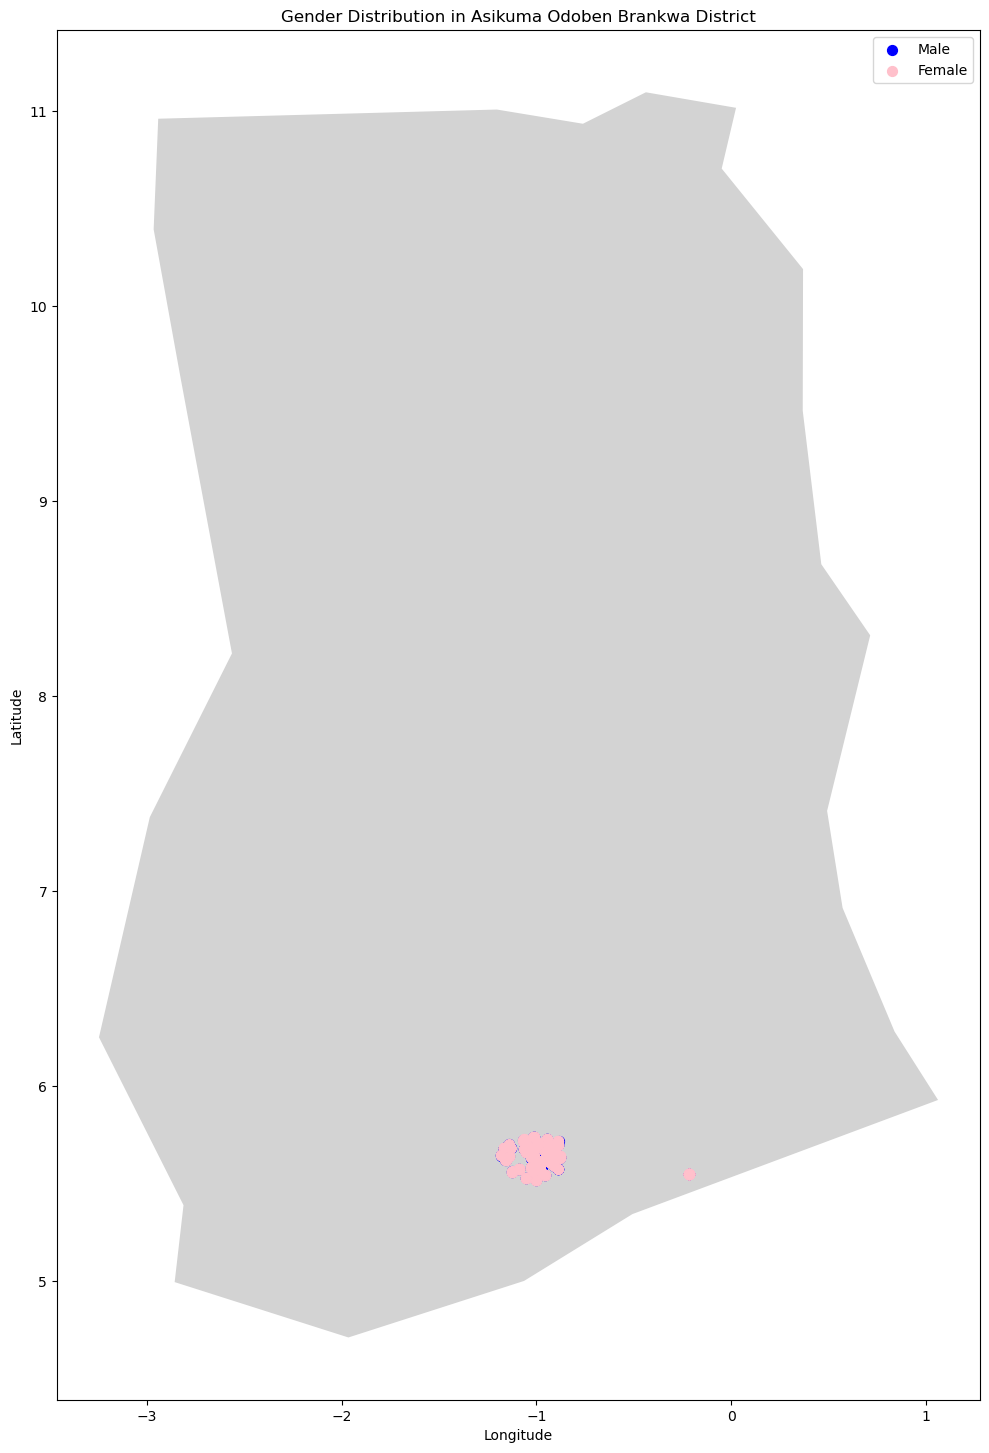

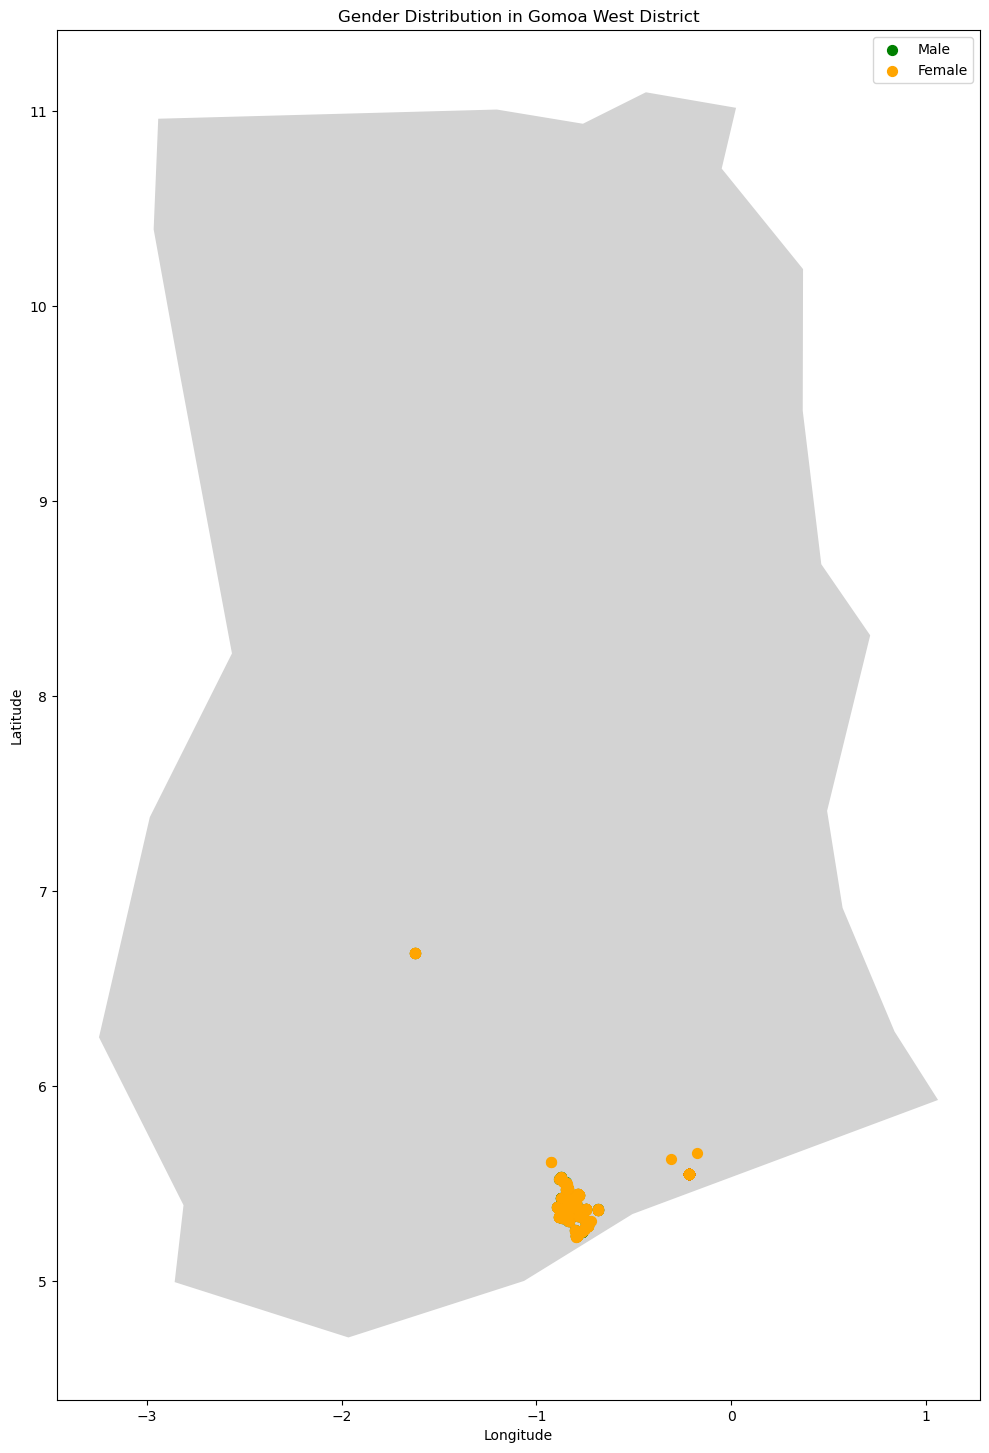

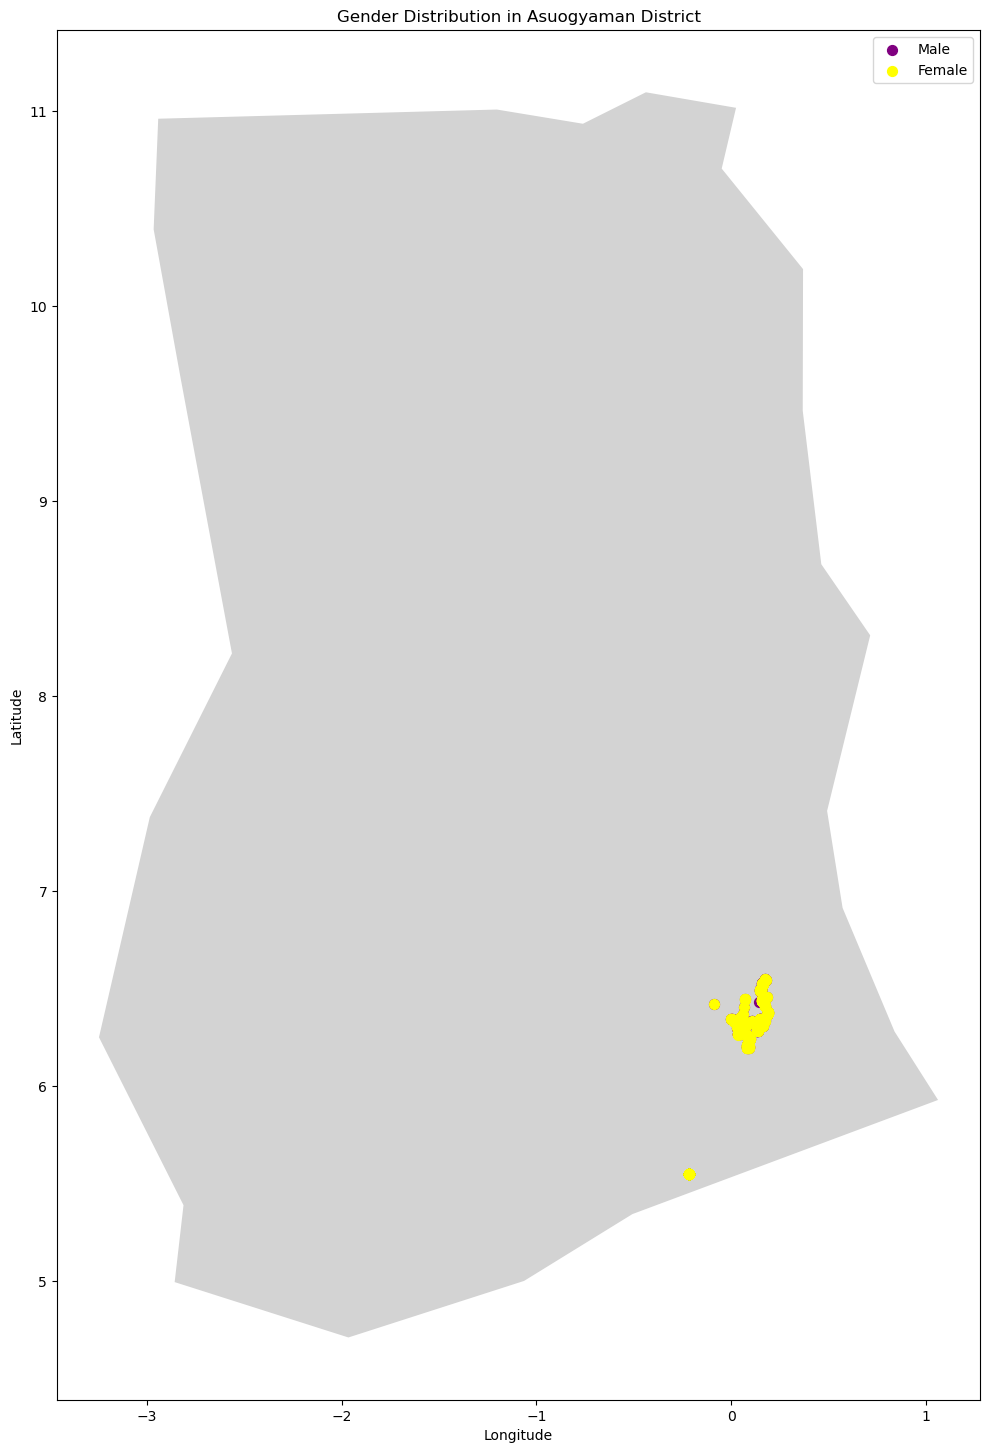

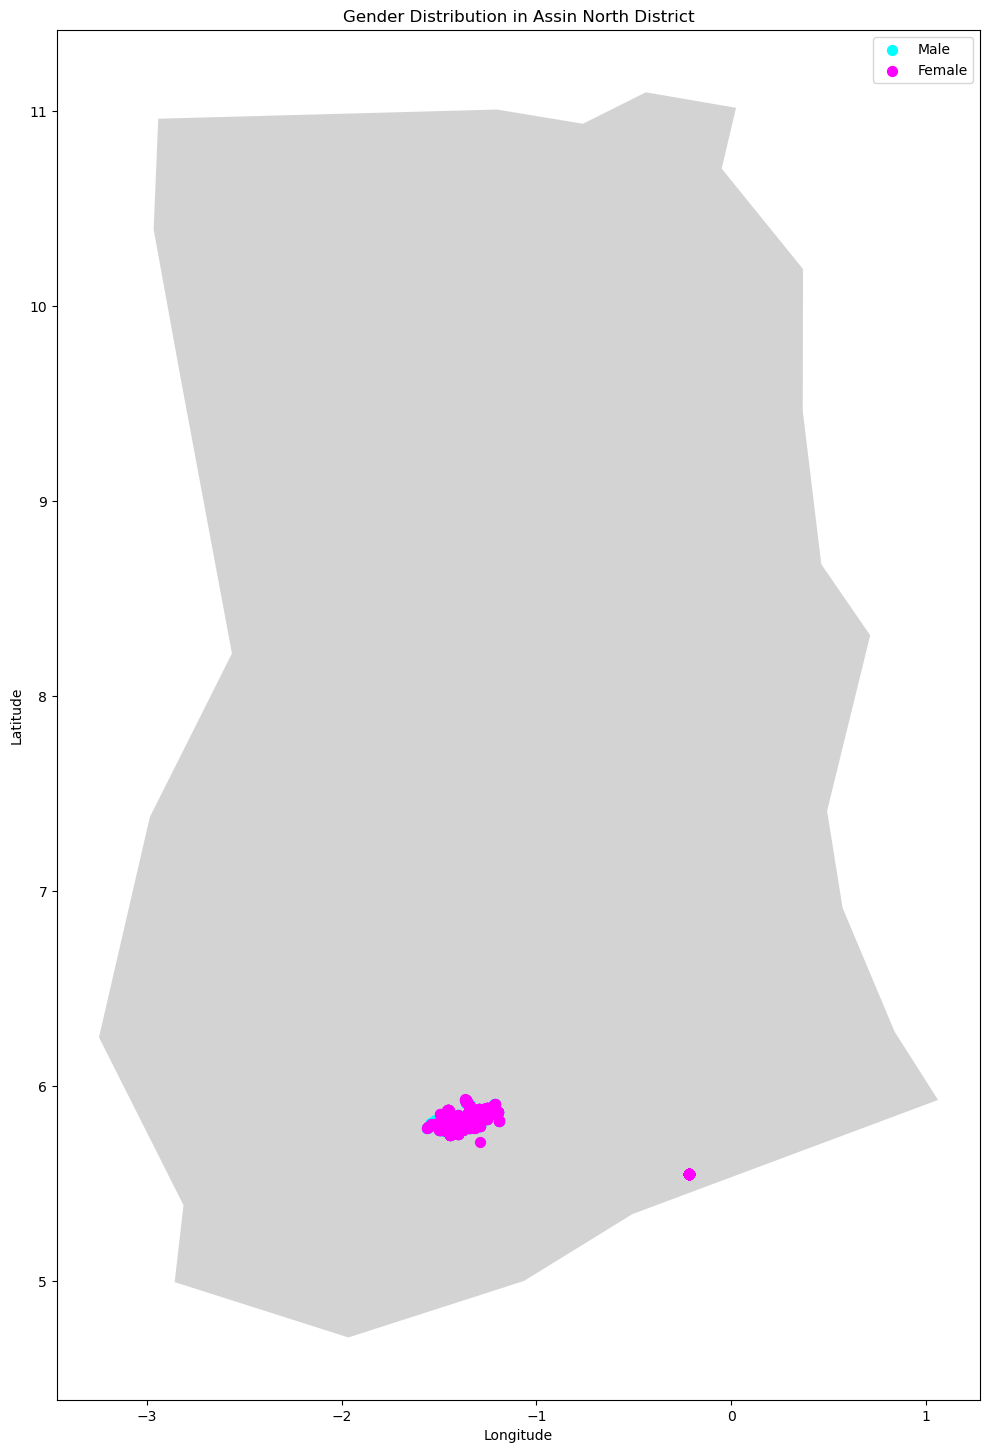

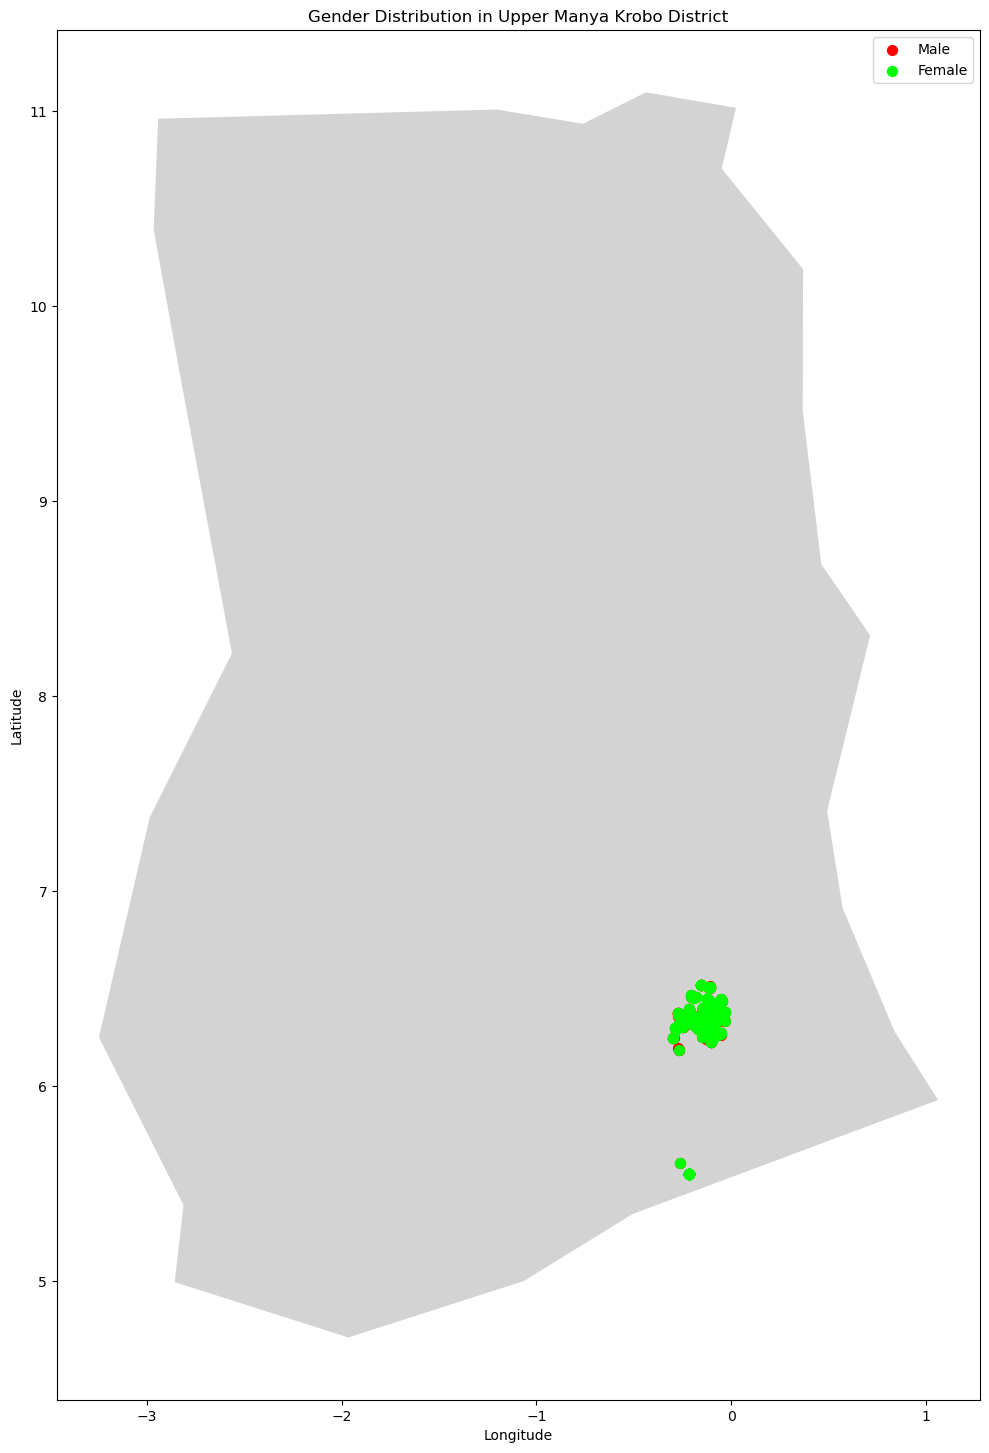

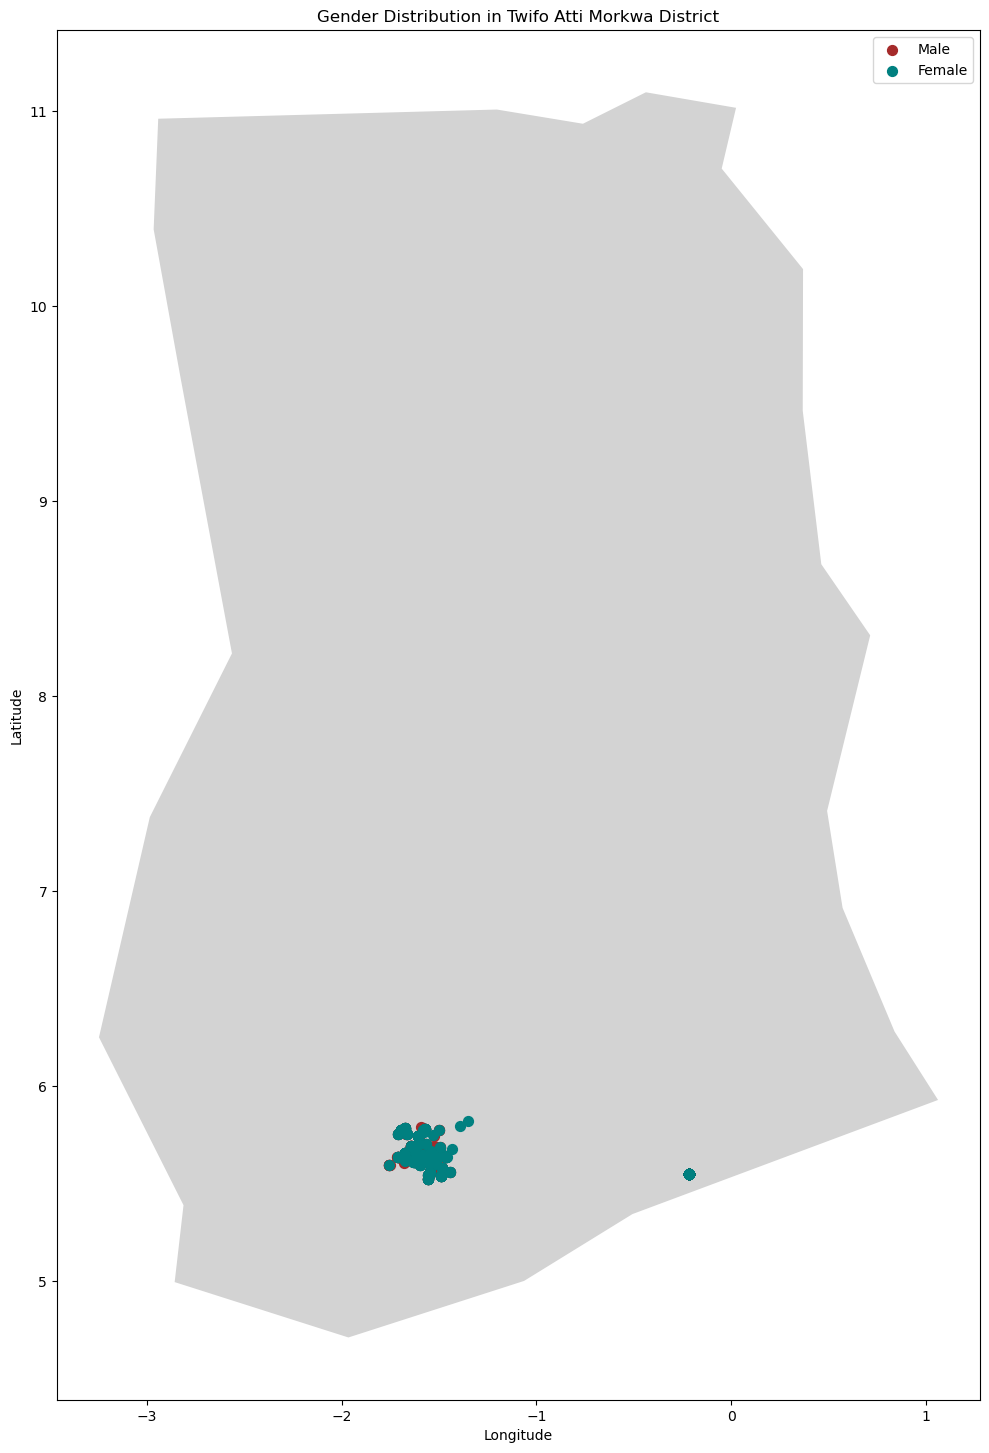

In [52]:
west_africa = world[world['ADMIN'].isin(['Ghana'])]



for district_name in district_names:
    district_data = gdf[gdf['District'] == district_name]
    
    
    colors = district_colors[district_name]
    
    
    fig, ax = plt.subplots(figsize=(10, 15))
    
    
    west_africa.plot(ax=ax, color='lightgray')
    
    
    for gender, color in colors.items():
        gender_data = district_data[district_data['Gender'] == gender]
        gender_data.plot(ax=ax, markersize=50, color=color, marker='o', label=f'{gender}')
    
    
    plt.title(f'Gender Distribution in {district_name}')
    plt.xlabel('Longitude')
    plt.ylabel('Latitude')
    plt.legend()
    plt.tight_layout()
    
    
    plt.show()
    
   


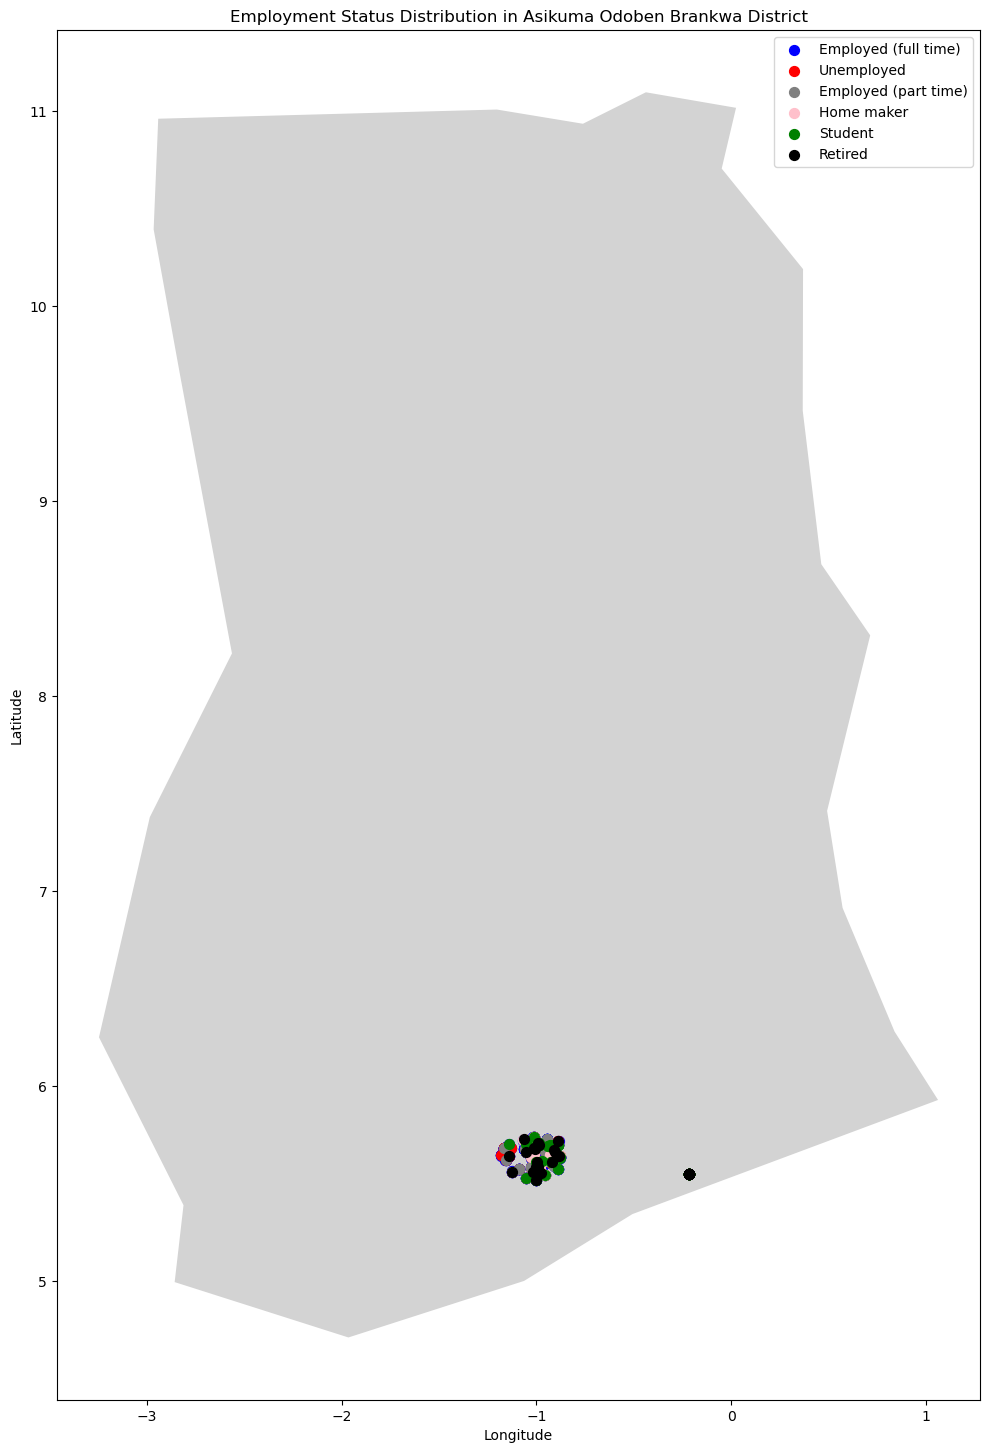

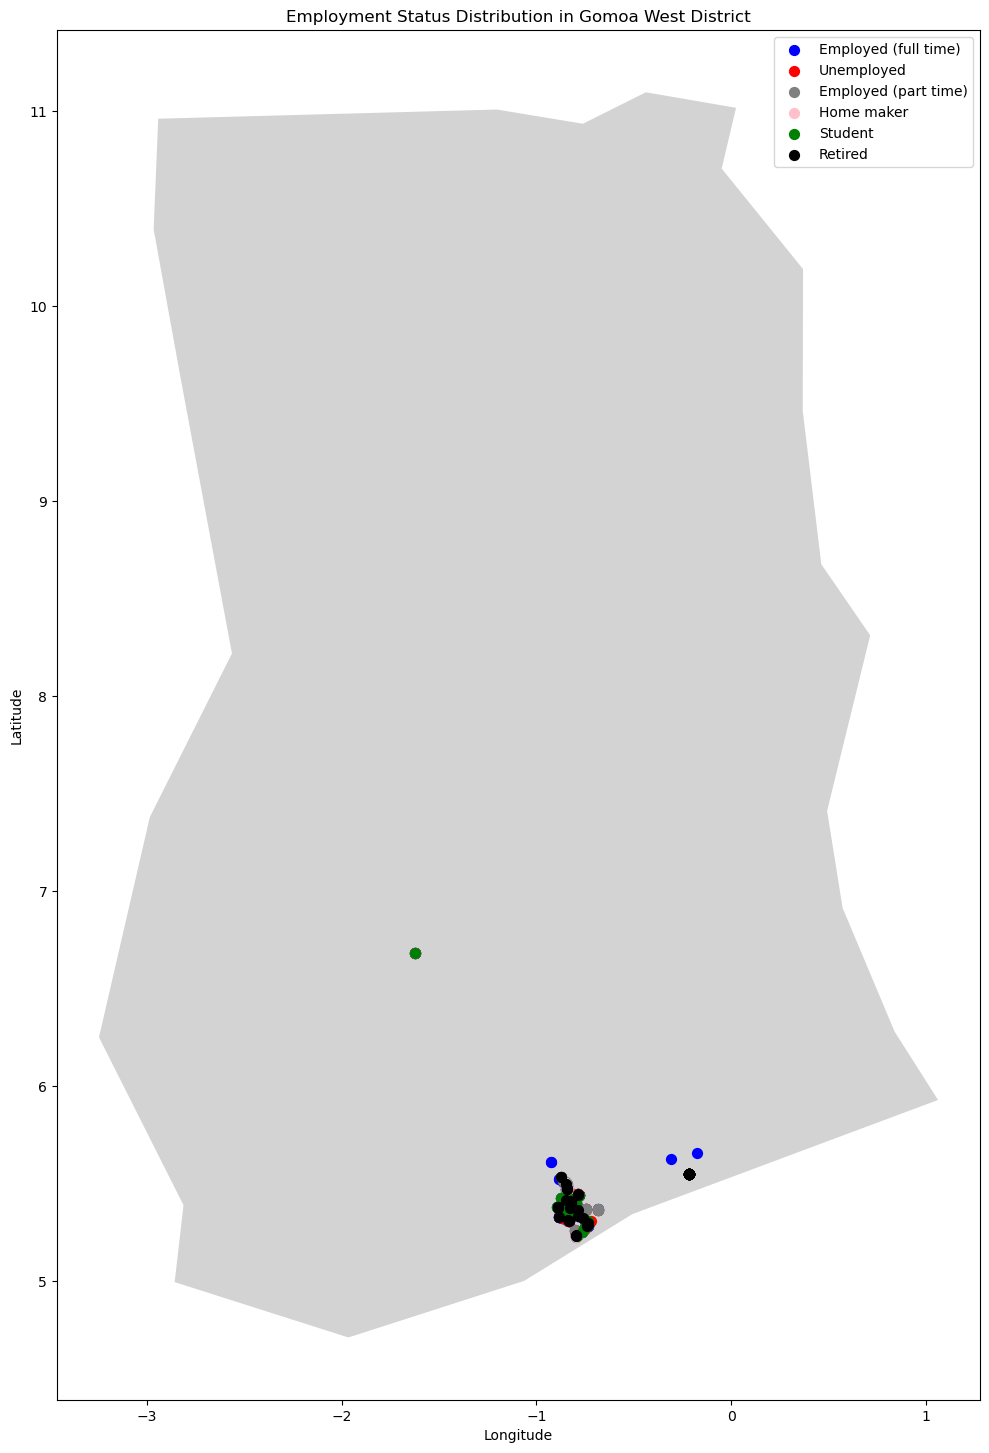

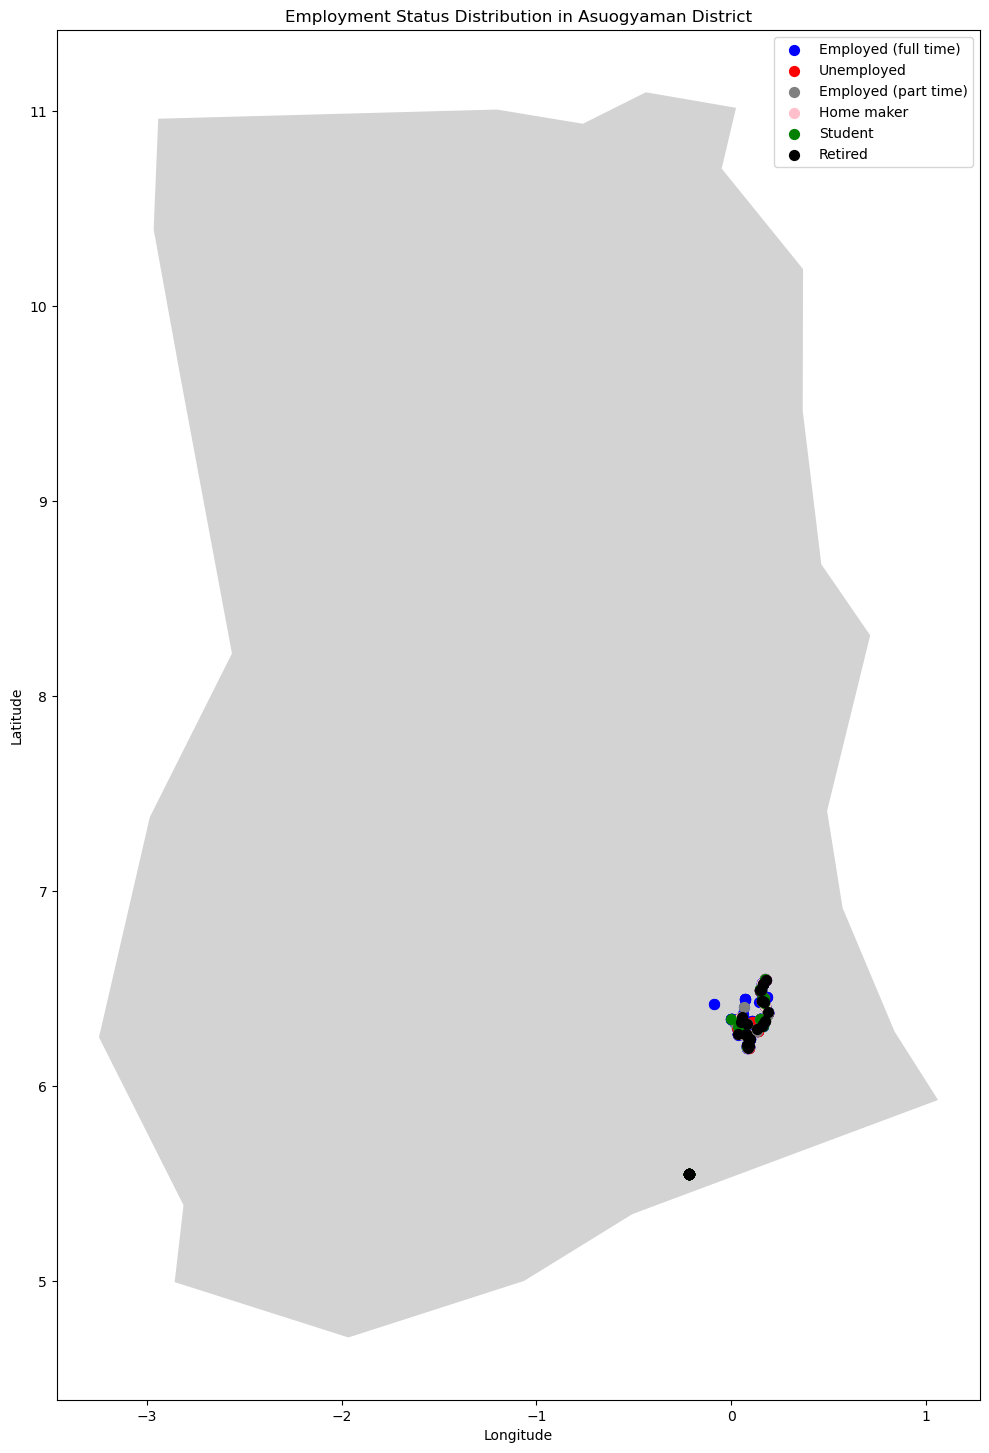

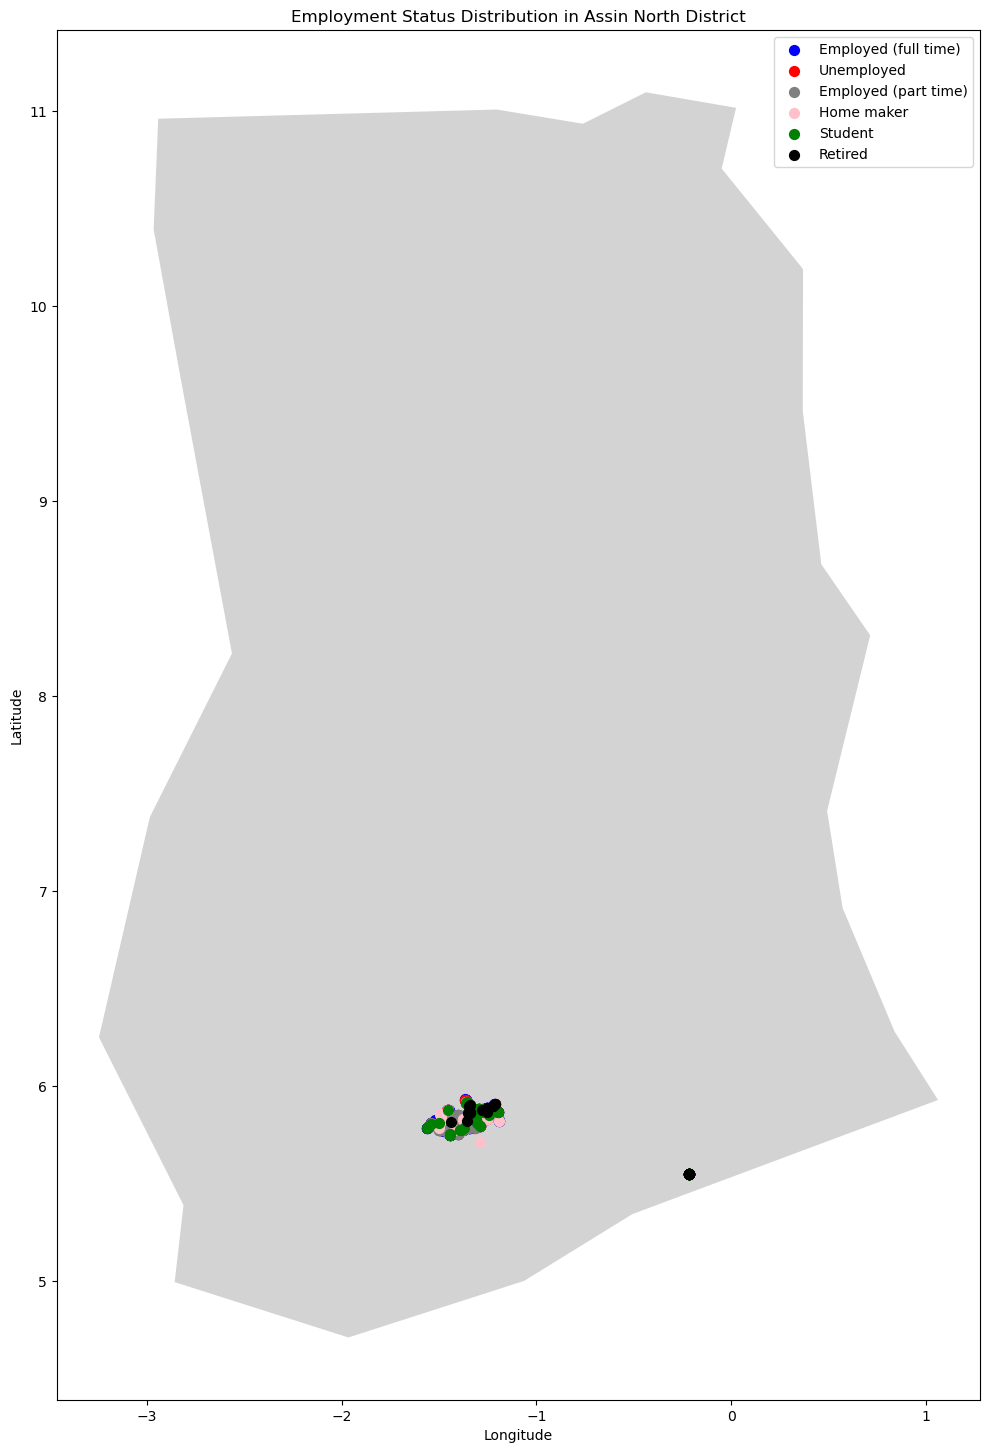

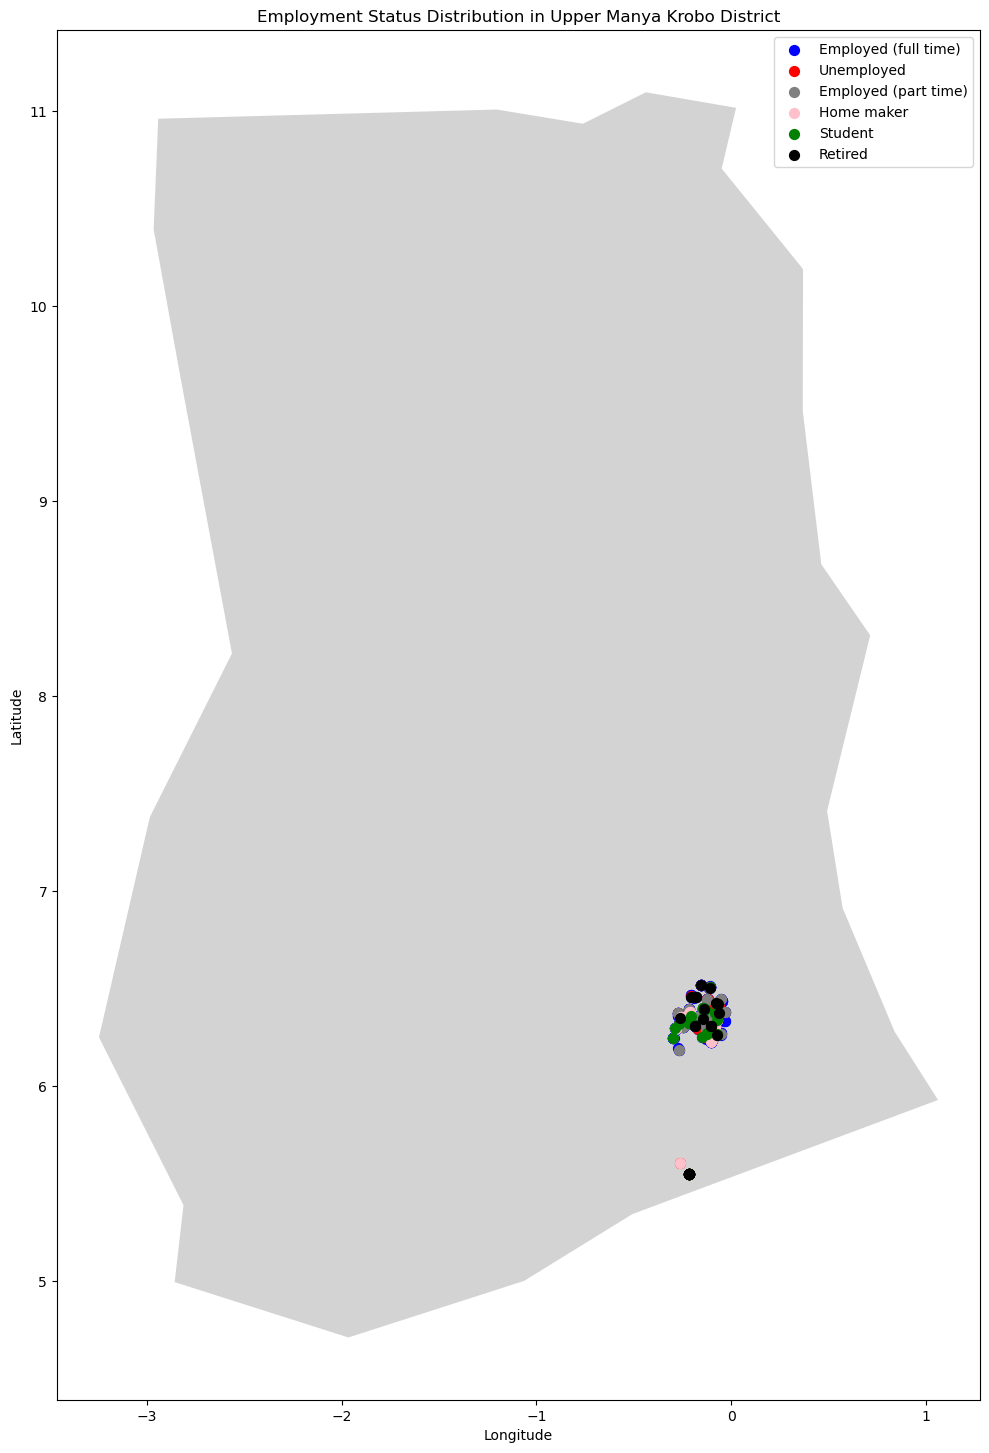

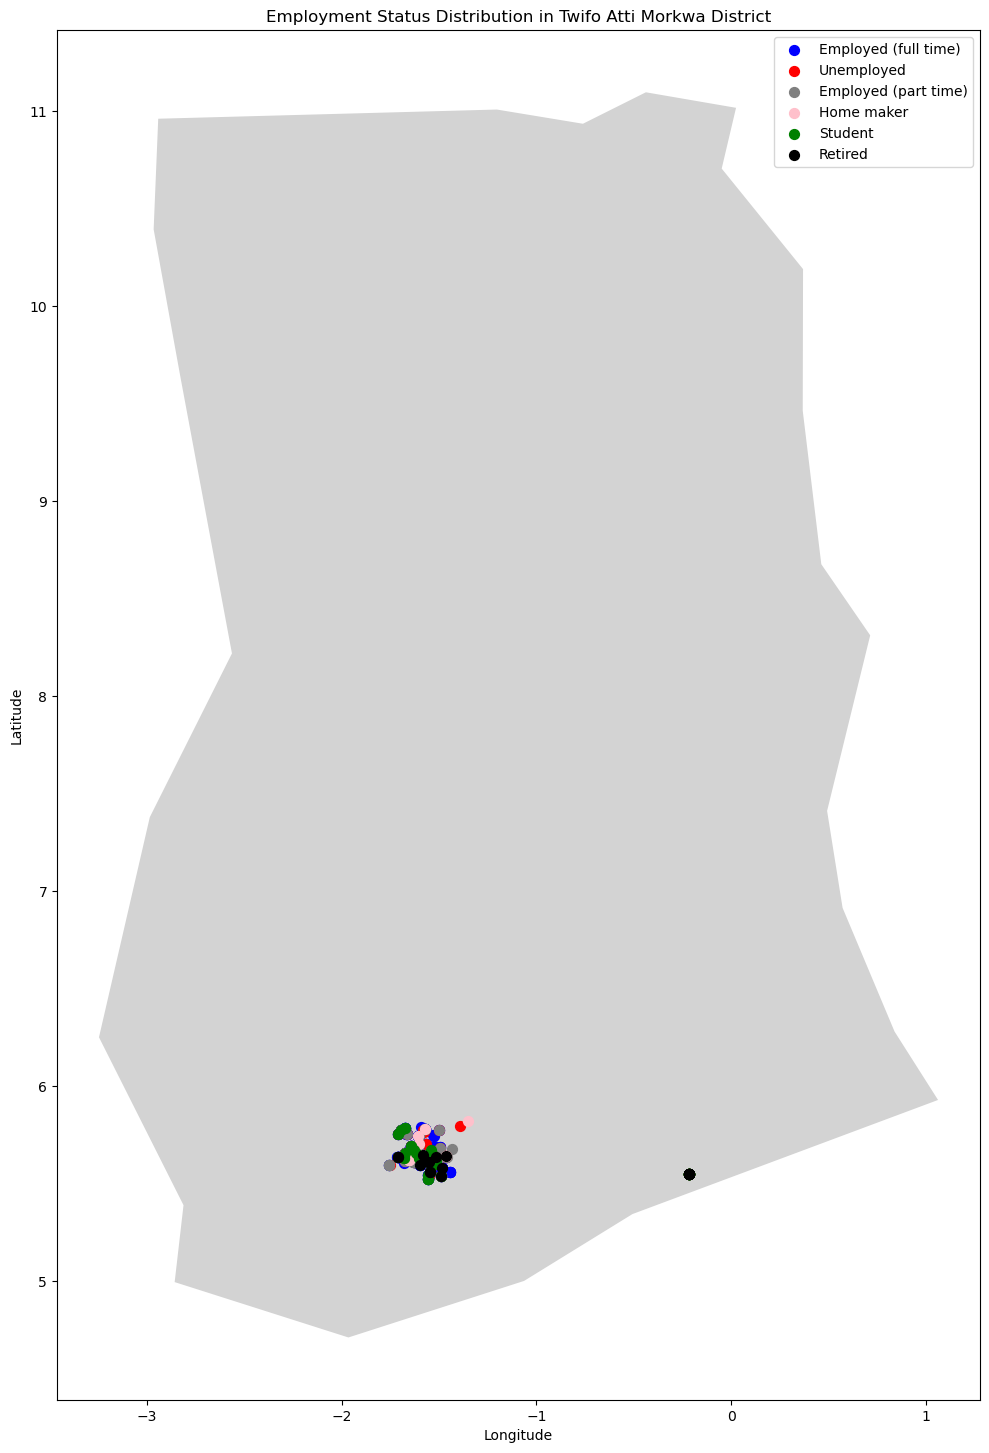

In [51]:
employment_colors = {
    'Employed (full time)': 'blue',
    'Unemployed': 'red',
    'Employed (part time)': 'gray',
    'Home maker': 'pink',
    'Student': 'green',
    'Retired': 'black'
   
}


west_africa = world[world['ADMIN'].isin(['Ghana'])]


for district_name in district_names:
    district_data = gdf[gdf['District'] == district_name]
    
    
    fig, ax = plt.subplots(figsize=(10, 15))
    
   
    west_africa.plot(ax=ax, color='lightgray')
    
   
    for status, color in employment_colors.items():
        status_data = district_data[district_data['Employment(Status)'] == status]
        status_data.plot(ax=ax, markersize=50, color=color, marker='o', label=f'{status}')
    

    plt.title(f'Employment Status Distribution in {district_name}')
    plt.xlabel('Longitude')
    plt.ylabel('Latitude')
    plt.legend()
    plt.tight_layout()
    
  
    plt.show()
    
